# **01**

## Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import math
from google.colab import files

In [2]:
ex=pd.read_csv("/content/drive/MyDrive/Internship Project/Project 04/Warehouse_and_Retail_Sales.csv")
ex.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [3]:
ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [4]:
ex.shape

(307645, 9)

In [5]:
print("The Null value Checked:-\n",ex.isnull().sum())

The Null value Checked:-
 YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64


In [6]:
print('Describe the Dataset:-\n',ex.describe())

Describe the Dataset:-
                 YEAR          MONTH   RETAIL SALES  RETAIL TRANSFERS  \
count  307645.000000  307645.000000  307642.000000     307645.000000   
mean     2018.438525       6.423862       7.024071          6.936465   
std         1.083061       3.461812      30.986238         30.237195   
min      2017.000000       1.000000      -6.490000        -38.490000   
25%      2017.000000       3.000000       0.000000          0.000000   
50%      2019.000000       7.000000       0.320000          0.000000   
75%      2019.000000       9.000000       3.267500          3.000000   
max      2020.000000      12.000000    2739.000000       1990.830000   

       WAREHOUSE SALES  
count    307645.000000  
mean         25.294597  
std         249.916798  
min       -7800.000000  
25%           0.000000  
50%           1.000000  
75%           5.000000  
max       18317.000000  


In [7]:
print('Duplicated Checked :-',ex[ex.duplicated()])

Duplicated Checked :- Empty DataFrame
Columns: [YEAR, MONTH, SUPPLIER, ITEM CODE, ITEM DESCRIPTION, ITEM TYPE, RETAIL SALES, RETAIL TRANSFERS, WAREHOUSE SALES]
Index: []


In [8]:
from scipy import stats

outlier_row_indices=set()
outlier_features=dict()

for column in ex.select_dtypes(include=np.number).columns:
  z_scores= stats.zscore(ex[column])
  outlier_row_indices.update(np.where(np.abs(z_scores)>3)[0])
  outlier_features[column]=len(np.where(np.abs(z_scores)>3)[0])

print('No of rows with outlier attribute:\t',len(outlier_row_indices))
print('Percentage of rows with outlier attribute in dataset:{:.2%}'.format(len(outlier_row_indices)/ex.shape[0]))
print('\n','-'*80)
print('Feature wise outlier count')
outlier_features

No of rows with outlier attribute:	 4686
Percentage of rows with outlier attribute in dataset:1.52%

 --------------------------------------------------------------------------------
Feature wise outlier count


{'YEAR': 0,
 'MONTH': 0,
 'RETAIL SALES': 0,
 'RETAIL TRANSFERS': 3560,
 'WAREHOUSE SALES': 1749}

# **02**

## **Feature Engineering & EDA**

---



In [9]:
def custom_round(value):
    """Rounds a number up if the decimal part is >= 0.50."""
    if isinstance(value, float):
        decimal_part = value - math.floor(value)
        if decimal_part >= 0.50:
            return math.ceil(value)  # Round up
        else:
            return math.floor(value)  # Round down
    else:
        return value

### 1.SUPPLIER COLUMN

In [10]:
ex['SUPPLIER'].value_counts()

,count
SUPPLIER,
REPUBLIC NATIONAL DISTRIBUTING CO,20995
LEGENDS LTD,13634
SOUTHERN GLAZERS WINE AND SPIRITS,11720
E & J GALLO WINERY,10816
"THE COUNTRY VINTNER, LLC DBA WINEBOW",10669
...,...
G GAUTHIER CELLARS INC,1
GJS SALES INC,1
BLACK ANKLE VINEYARDS LLC,1


SUPPLIER have 167 Null Value we fill with default value

In [11]:
ex['SUPPLIER']=ex['SUPPLIER'].fillna('Default')

### 2.YEAR

In [12]:
ex['YEAR'].value_counts()

,count
YEAR,
2019,138638
2017,96284
2020,46278
2018,26445


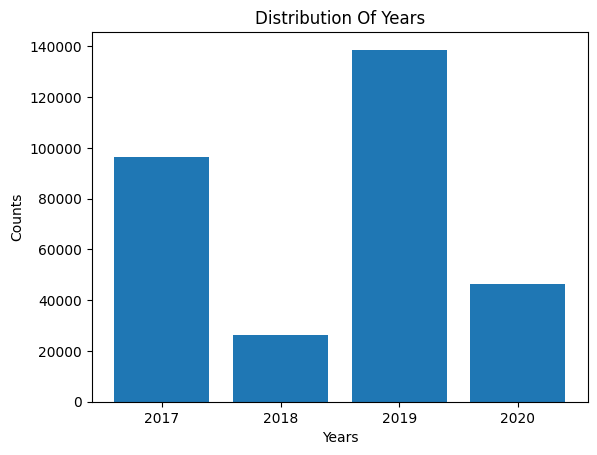

In [13]:
# Sort unique years
x = sorted(ex['YEAR'].unique())

# Get counts for each year
y = ex['YEAR'].value_counts().sort_index().values  # Ensure the order matches `x`

# Create the bar plot
plt.bar(x, y)

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Counts')
plt.title('Distribution Of Years')

# Ensure x-axis has integer labels
plt.xticks(ticks=x, labels=[int(year) for year in x])

# Show the plot
plt.show()


### 3.MONTH

In [14]:
ex['MONTH'].value_counts().sort_index()

,count
MONTH,
1,37724
2,25389
3,24206
4,12734
5,12948
6,25958
7,36710
8,26003
9,37380


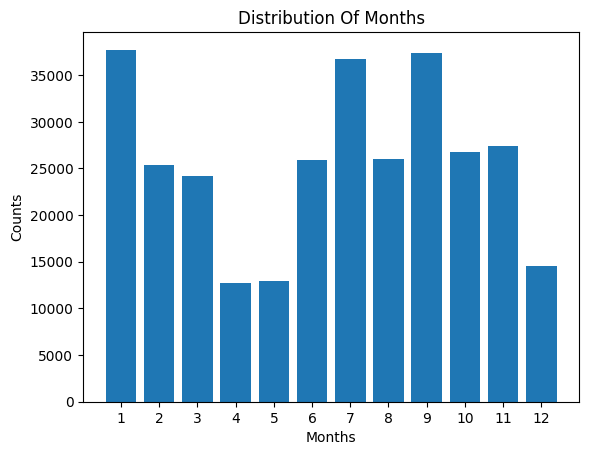

In [15]:
# Sort unique years
x = sorted(ex['MONTH'].unique())

# Get counts for each year
y = ex['MONTH'].value_counts().sort_index().values  # Ensure the order matches `x`

# Create the bar plot
plt.bar(x, y)

# Add labels and title
plt.xlabel('Months')
plt.ylabel('Counts')
plt.title('Distribution Of Months')

# Ensure x-axis has integer labels
plt.xticks(ticks=x, labels=[int(months) for months in x])

# Show the plot
plt.show()


### 4.ITEM CODE

In [16]:
ex['ITEM CODE'].value_counts().sort_index()

,count
ITEM CODE,
100002,1
100007,4
100008,3
100009,13
100011,3
...,...
99970,24
99988,9
99990,12


 BC is convert into numerical 11 & WC is convert into 22.

In [17]:
ex['ITEM CODE'] = ex['ITEM CODE'].str.replace('BC', '11', regex=True)
ex['ITEM CODE'] = ex['ITEM CODE'].str.replace('WC', '22', regex=True)
ex['ITEM CODE'] = ex['ITEM CODE'].str.replace('A','')


In [18]:
ex['ITEM CODE'] =ex['ITEM CODE'].astype('int64')

### 5. RETAIL SALES

In [19]:
ex['RETAIL SALES'].value_counts()

,count
RETAIL SALES,
0.00,121702
0.08,10664
0.17,6819
0.16,6091
0.24,3921
...,...
90.03,1
94.11,1
368.64,1


In [20]:
ex['RETAIL SALES'].isnull().sum()

3

In [21]:
# Fill NaN values with 0 before applying rounding
ex['RETAIL SALES'] = ex['RETAIL SALES'].fillna(0)

In [22]:
# Apply custom rounding
ex['RETAIL SALES'] = ex['RETAIL SALES'].apply(custom_round)

### 6. RETAIL TRANSFERS

In [23]:
ex['RETAIL TRANSFERS'].isnull().sum()

0

In [24]:
#Round of the value
ex['RETAIL TRANSFERS']=ex['RETAIL TRANSFERS'].apply(custom_round)

### 7. WAREHOUSE SALES

In [25]:
def count(series, column_name="Column"):
  counts = series.value_counts()
  items = list(counts.items())

  # Sort the items based on value (supplier name) in ascending order
  items.sort(key=lambda item: str(item[0]).strip() if isinstance(item[0], (str, float)) else item[0])

  for value, count in items:
     print(f"{value}:{count}")

In [26]:
# Round off the value
ex['WAREHOUSE SALES']=ex['WAREHOUSE SALES'].apply(custom_round)

In [27]:
count(ex['WAREHOUSE SALES'])

-7800:1
-4996:1
-4804:1
-4536:1
-4365:1
-4364:1
-4349:1
-4312:1
-4302:1
-4299:1
-4210:1
-4155:1
-4035:1
-3999:1
-3992:1
-3983:1
-3924:1
-3870:1
-3820:1
-3688:1
-3666:1
-3370:1
-2070:1
-1876:1
-1755:1
-1675:1
-1644:1
-1324:1
-1308:1
-1238:1
-1208:1
-1118:1
-1068:1
-1051:1
-1028:1
-1008:1
-1007:1
-1002:1
-991:1
-984:1
-973:1
-959:1
-946:1
-944:1
-934:1
-925:1
-850:1
-848:1
-821:1
-797:1
-781:1
-699:1
-573:1
-562:1
-502:1
-461:1
-447:1
-441:1
-375:1
-365:1
-363:1
-362:1
-361:1
-341:1
-337:1
-332:1
-331:1
-323:1
-322:1
-316:1
-308:1
-287:1
-286:1
-284:1
-281:1
-279:1
-275:1
-271:1
-263:1
-259:1
-252:2
-247:1
-229:2
-215:1
-200:1
-190:1
-168:1
-166:1
-165:1
-164:1
-156:1
-133:1
-123:1
-108:1
-99:1
-81:1
-79:1
-77:1
-73:1
-71:1
-70:1
-64:1
-58:2
-46:2
-40:1
-39:1
-35:1
-34:1
-31:1
-26:1
-21:2
-20:1
-19:1
-18:3
-17:2
-15:2
-12:2
-11:5
-10:2
-9:5
-8:4
-7:6
-6:8
-5:5
-4:13
-3:21
-2:65
-1:406
0:97009
1:65374
2:30680
3:17982
4:12503
5:9187
6:7216
7:5549
8:4682
9:3902
10:3436
11:2942
12:2503
13:21

### 8. ITEM TYPE

In [28]:
count(ex['ITEM TYPE'])

BEER:42413
DUNNAGE:95
KEGS:10146
LIQUOR:64910
NON-ALCOHOL:1908
REF:127
STR_SUPPLIES:405
WINE:187640


In [29]:
ex['ITEM TYPE'].isnull().sum()

1

In [30]:
ex['ITEM TYPE']=ex['ITEM TYPE'].fillna('NON-ALCOHOL')

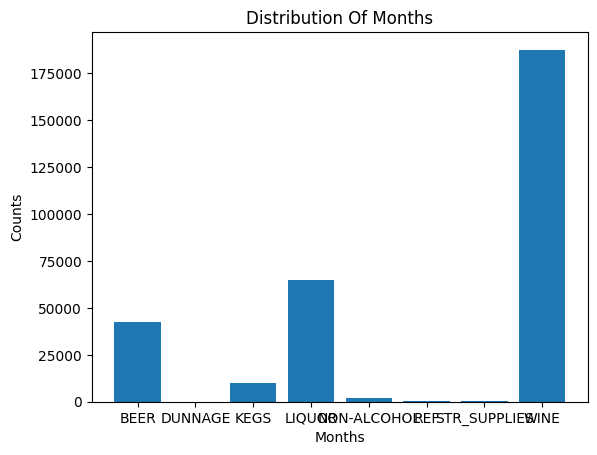

In [31]:
# Sort unique years
x = sorted(ex['ITEM TYPE'].unique())

# Get counts for each year
y = ex['ITEM TYPE'].value_counts().sort_index().values  # Ensure the order matches `x`

# Create the bar plot
plt.bar(x, y)

# Add labels and title
plt.xlabel('Months')
plt.ylabel('Counts')
plt.title('Distribution Of Months')

# Ensure x-axis has integer labels
#plt.xticks(ticks=x, labels=[int(months) for months in x])

# Show the plot
plt.show()


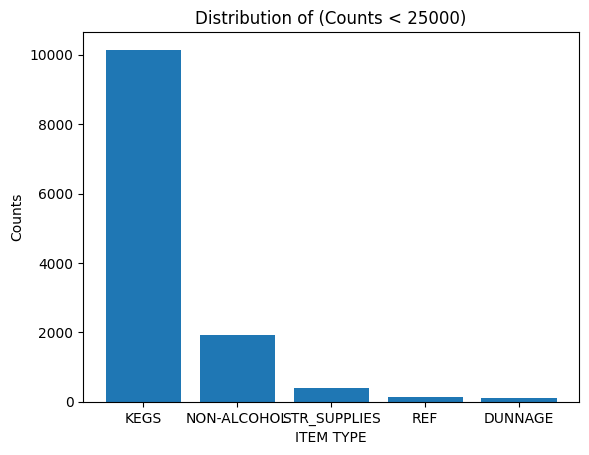

In [32]:
# Get value counts for all item types
item_counts = ex['ITEM TYPE'].value_counts()

# Filter for counts less than 25000
filtered_counts = item_counts[item_counts < 25000]

# Extract filtered item types and counts
x = filtered_counts.index
y = filtered_counts.values

# Create the bar plot
plt.bar(x, y)

# Add labels and title
plt.xlabel('ITEM TYPE')
plt.ylabel('Counts')
plt.title('Distribution of (Counts < 25000)')

# Show the plot
plt.show()

### 9. ITEM DESCRIPTION

In [33]:
count(ex['ITEM DESCRIPTION'])

Streaming output truncated to the last 5000 lines.
ST INNOCENT P/NOIR SHEA - 750ML:2
ST INNOCENT P/NOIR VIL CUV - 750ML:15
ST INNOCENT P/NOIR ZENITH - 375ML:1
ST INNOCENT P/NOIR ZENITH - 750ML:9
ST INNOCENT TEM PERANCE HILL P/NOIR - 750ML:1
ST INNOCENT TEMPERENCE HILL P/NOIR - 750ML:4
ST INNOCENT VITAE SPRINGS P/GRIS - 750ML:1
ST JAMES CRANBERRY - 750ML:1
ST JORIS PINOT NOIR 750ML:2
ST JORIS PINOT NOIR RISERVA 750ML:2
ST KILDA BRUT CUVEE - 750ML:1
ST KILDA CHARD - 750ML:24
ST KILDA SHZ - 750ML:19
ST LORENZ CHRISTKINDL GLUH - 1L:1
ST LOUIS FRAMBROISE NR - 750ML:2
ST MICHAEL AUS RIES - 750ML:21
ST MICHAEL GMBH RIESLING - 750ML:18
ST MICHAEL-EPPAN ANGER SUDTIROL P/GRIG - 750ML:1
ST MICHAEL-EPPAN P/NOIR - 750ML:7
ST MICHAEL-EPPAN SANCT VALENTIN P/NOIR RIS - 750ML:1
ST MICHAEL-EPPAN SANCT VALENTIN SAUVIGNON - 750ML:1
ST MICHAEL-EPPAN SCHULTHAUSER P/BIANCO - 750ML:3
ST MICHAEL-EPPAN SUDTIROL P/GRIG - 750ML:3
ST MICHAELS CHOCOLATE ZIN - 375ML:24
ST MICHAELS GOLLY WOBBLER BLK 338709 - 750ML:24

#### DATA DESCRIPTION COLUMN SPILT INTO NEW COLUMNS

In [34]:
def split_by_special_chars(description):
  # Define a pattern to match any non-alphanumeric, non-space, and non-point character
  pattern = r"[^a-zA-Z0-9\s.]"

  # Split the description using the pattern
  split_description = re.split(pattern, description)

  return split_description


In [35]:
# Apply the function to the 'ITEM DESCRIPTION' column
ex['split_description'] = ex['ITEM DESCRIPTION'].apply(split_by_special_chars)

In [36]:
# Create new columns and add the split values
max_splits = ex['split_description'].apply(len).max()  # Find max number of splits
for i in range(max_splits):
    ex[f'split_part_{i+1}'] = ex['split_description'].apply(lambda x: x[i] if i < len(x) else None)

# Drop the temporary 'split_description' column
ex.drop(columns=['split_description'], inplace=True)

# Example usage:
print(ex[['ITEM DESCRIPTION', 'split_part_1', 'split_part_2', 'split_part_3']].head())

                      ITEM DESCRIPTION                 split_part_1  \
0                  BOOTLEG RED - 750ML                 BOOTLEG RED    
1            MOMENT DE PLAISIR - 750ML           MOMENT DE PLAISIR    
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ  S SMITH ORGANIC PEAR CIDER    
3        SCHLINK HAUS KABINETT - 750ML       SCHLINK HAUS KABINETT    
4       SANTORINI GAVALA WHITE - 750ML      SANTORINI GAVALA WHITE    

  split_part_2 split_part_3  
0        750ML         None  
1        750ML         None  
2       18.7OZ         None  
3        750ML         None  
4        750ML         None  


In [37]:
# Remove extra spaces from split_part_2
ex['split_part_2'] = ex['split_part_2'].str.strip()
ex['split_part_1'] = ex['split_part_1'].str.strip()

# Check if the strings start with an alphabet
ex['starts_with_alphabet'] = ex['split_part_2'].fillna('').str.match(r'^[a-zA-Z]')

# Check if the strings start with a number
ex['starts_with_number'] = ex['split_part_2'].fillna('').str.match(r'^[0-9]')

In [38]:
# Create 'joined_column' based on alphabet condition
ex['joined_column'] = (
    ex['split_part_1'] + ' ' + ex['split_part_2']
).where(ex['starts_with_alphabet'], ex['split_part_1'])

# Create 'number_column' based on number condition
ex['number_column'] = ex['split_part_2'].where(ex['starts_with_number'], None)

In [39]:
# Drop unnecessary columns
ex = ex.drop(columns=['starts_with_alphabet', 'starts_with_number'])


In [40]:
ex.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,split_part_1,split_part_2,split_part_3,split_part_4,split_part_5,split_part_6,split_part_7,split_part_8,joined_column,number_column
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0,0,2,BOOTLEG RED,750ML,None,None,None,None,None,None,BOOTLEG RED,750ML
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0,1,4,MOMENT DE PLAISIR,750ML,None,None,None,None,None,None,MOMENT DE PLAISIR,750ML
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0,0,1,S SMITH ORGANIC PEAR CIDER,18.7OZ,None,None,None,None,None,None,S SMITH ORGANIC PEAR CIDER,18.7OZ
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0,0,1,SCHLINK HAUS KABINETT,750ML,None,None,None,None,None,None,SCHLINK HAUS KABINETT,750ML
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,1,0,0,SANTORINI GAVALA WHITE,750ML,None,None,None,None,None,None,SANTORINI GAVALA WHITE,750ML


In [41]:
# Display the result
ex[['ITEM DESCRIPTION', 'joined_column', 'number_column']].sample(10)

,ITEM DESCRIPTION,joined_column,number_column
91599,MILLER LITE BIG 18 PK CANS - 16OZ,MILLER LITE BIG 18 PK CANS,16OZ
64590,ANDERSON BOONT AMBER CANS 4/6 CAN - 12OZ,ANDERSON BOONT AMBER CANS 4,6 CAN
178396,BLUECOAT GIN - 750ML,BLUECOAT GIN,750ML
145400,TROIS PISTOLES 12/25.4OZ NR - 25.4OZ,TROIS PISTOLES 12,25.4OZ NR
210442,INNOCENT BYSTANDER P/NOIR - 750ML,INNOCENT BYSTANDER P NOIR,None
249460,CH DE PARAZA MINERVOIS RSE - 750ML,CH DE PARAZA MINERVOIS RSE,750ML
189151,EFFIN AWESOME 16%,EFFIN AWESOME 16,None
214875,CLOS DU BOIS LTBB CHARD - 750ML,CLOS DU BOIS LTBB CHARD,750ML
281517,MAESTRO DOBEL DIAMANTE TEQ - 750ML,MAESTRO DOBEL DIAMANTE TEQ,750ML
22841,LEJON DRY VERMOUTH - 750ML,LEJON DRY VERMOUTH,750ML


In [42]:
ex[['split_part_3','number_column','joined_column']].sample(10)

,split_part_3,number_column,joined_column
306878,None,750ML,LITTLE PENGUIN CAB
249218,None,750ML,99 VINES ZIN
285400,NOIR,None,SANFORD S B P
92045,None,6K,BALTIMORE WASHINGTON THE RAVEN 1
109525,None,750ML,CARPINETO VINO NOBILE DI MONTEPUL
87858,1.5L,None,YELLOW TAIL P GRIG
269018,None,750ML,HUDSON MAPLE CASK RYE WHISKEY
166862,None,750ML,PERNOD RICARD ANISE
56974,None,750ML,BEN AMI MER
130330,750ML,20 ELECTRIC MELON,MD 20


####TREAT SPLIT_PART_3 COLUMN

In [43]:
# Remove extra spaces from split_part_2
ex['split_part_3'] = ex['split_part_3'].str.strip()

# Check if the strings start with an alphabet
ex['starts_with_alphabet'] = ex['split_part_3'].fillna('').str.match(r'^[a-zA-Z]')

# Check if the strings start with a number
ex['starts_with_number'] = ex['split_part_3'].fillna('').str.match(r'^[0-9]')

In [44]:
# Create 'joined_column' based on alphabet condition
ex['joined_column'] = (
    ex['joined_column'] + ' ' + ex['split_part_3']
).where(ex['starts_with_alphabet'], ex['joined_column'])



In [45]:
# Create 'number_column' based on number condition
ex['number_column'] = ex['split_part_3'].fillna(
    ex['number_column'] + '' + ex['split_part_3']
).where(ex['starts_with_number'], other=ex['number_column'])


In [46]:
ex.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,split_part_1,...,split_part_3,split_part_4,split_part_5,split_part_6,split_part_7,split_part_8,joined_column,number_column,starts_with_alphabet,starts_with_number
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0,0,2,BOOTLEG RED,...,None,None,None,None,None,None,BOOTLEG RED,750ML,False,False
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0,1,4,MOMENT DE PLAISIR,...,None,None,None,None,None,None,MOMENT DE PLAISIR,750ML,False,False
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0,0,1,S SMITH ORGANIC PEAR CIDER,...,None,None,None,None,None,None,S SMITH ORGANIC PEAR CIDER,18.7OZ,False,False
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0,0,1,SCHLINK HAUS KABINETT,...,None,None,None,None,None,None,SCHLINK HAUS KABINETT,750ML,False,False
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,1,0,0,SANTORINI GAVALA WHITE,...,None,None,None,None,None,None,SANTORINI GAVALA WHITE,750ML,False,False


In [47]:
# Drop unnecessary columns (except number_column)
ex = ex.drop(columns=['starts_with_number', 'starts_with_alphabet'])

####TREAT split_part_4 column

In [48]:
# Display the result
ex[['ITEM DESCRIPTION','split_part_4','number_column','joined_column']].sample(10)

,ITEM DESCRIPTION,split_part_4,number_column,joined_column
47966,BAREFOOT CEL CHARD - 187ML,None,187ML,BAREFOOT CEL CHARD
51503,RODENBACH 4/6 NR - 11.2OZ,None,11.2OZ,RODENBACH 4
306797,CHANDON CALIFORNIA BL DE NOIR - 750ML,None,750ML,CHANDON CALIFORNIA BL DE NOIR
39464,CH LA MOTHE DU BARRY ROUGE - 750ML,None,750ML,CH LA MOTHE DU BARRY ROUGE
50724,CRUZAN BANANA - 750ML,None,750ML,CRUZAN BANANA
52484,CULITOS MOSCATO - 750ML,None,750ML,CULITOS MOSCATO
235214,CASA SANTOS LIMA RESA DO MONTE - 750ML,None,750ML,CASA SANTOS LIMA RESA DO MONTE
112877,BITTER TRUTH CELERY BITTERS - 200ML,None,200ML,BITTER TRUTH CELERY BITTERS
123218,BRYN MAWR RSE - 750ML,None,750ML,BRYN MAWR RSE
75742,MILLER HIGH LIFE 4/6 LNNR - 12OZ,None,12OZ,MILLER HIGH LIFE 4


In [49]:
# Remove extra spaces from split_part_4
ex['split_part_4'] = ex['split_part_4'].str.strip()

# Check if the strings start with an alphabet
ex['starts_with_alphabet'] = ex['split_part_4'].fillna('').str.match(r'^[a-zA-Z]')

# Check if the strings start with a number
ex['starts_with_number'] = ex['split_part_4'].fillna('').str.match(r'^[0-9]')

In [50]:
# Create 'joined_column' based on alphabet condition
ex['joined_column'] = (
    ex['joined_column'] + ' ' + ex['split_part_4']
).where(ex['starts_with_alphabet'], ex['joined_column'])



In [51]:
# Create 'number_column' based on number condition
ex['number_column'] = ex['split_part_4'].fillna(
    ex['number_column'] + '' + ex['split_part_4']
).where(ex['starts_with_number'], other=ex['number_column'])


In [52]:
ex.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,split_part_1,...,split_part_3,split_part_4,split_part_5,split_part_6,split_part_7,split_part_8,joined_column,number_column,starts_with_alphabet,starts_with_number
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0,0,2,BOOTLEG RED,...,None,None,None,None,None,None,BOOTLEG RED,750ML,False,False
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0,1,4,MOMENT DE PLAISIR,...,None,None,None,None,None,None,MOMENT DE PLAISIR,750ML,False,False
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0,0,1,S SMITH ORGANIC PEAR CIDER,...,None,None,None,None,None,None,S SMITH ORGANIC PEAR CIDER,18.7OZ,False,False
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0,0,1,SCHLINK HAUS KABINETT,...,None,None,None,None,None,None,SCHLINK HAUS KABINETT,750ML,False,False
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,1,0,0,SANTORINI GAVALA WHITE,...,None,None,None,None,None,None,SANTORINI GAVALA WHITE,750ML,False,False


#### Treating split_part_5 column

In [53]:
ex['split_part_5'] = ex['split_part_5'].str.strip()

# Check if the strings start with an alphabet
ex['starts_with_alphabet'] = ex['split_part_5'].fillna('').str.match(r'^[a-zA-Z]')

# Check if the strings start with a number
ex['starts_with_number'] = ex['split_part_5'].fillna('').str.match(r'^[0-9]')

In [54]:
# Create 'joined_column' based on alphabet condition
ex['joined_column'] = (
    ex['joined_column'] + ' ' + ex['split_part_5']
).where(ex['starts_with_alphabet'], ex['joined_column'])



In [55]:
# Create 'number_column' based on number condition
ex['number_column'] = ex['split_part_5'].fillna(
    ex['number_column'] + '' + ex['split_part_5']
).where(ex['starts_with_number'], other=ex['number_column'])

In [56]:
ex.sample(10).where(ex['starts_with_number']!=True).dropna()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,split_part_1,...,split_part_3,split_part_4,split_part_5,split_part_6,split_part_7,split_part_8,joined_column,number_column,starts_with_alphabet,starts_with_number


In [57]:
ex=ex.drop(columns=['starts_with_alphabet','starts_with_alphabet'])

####Treating split_part_6 column

In [58]:
ex['split_part_6'] = ex['split_part_6'].str.strip()

# Check if the strings start with an alphabet
ex['starts_with_alphabet'] = ex['split_part_6'].fillna('').str.match(r'^[a-zA-Z]')

# Check if the strings start with a number
ex['starts_with_number'] = ex['split_part_6'].fillna('').str.match(r'^[0-9]')

In [59]:
# Create 'joined_column' based on alphabet condition
ex['joined_column'] = (
    ex['joined_column'] + ' ' + ex['split_part_6']
).where(ex['starts_with_alphabet'], ex['joined_column'])

In [60]:
# Create 'number_column' based on number condition
ex['number_column'] = ex['split_part_6'].fillna(
    ex['number_column'] + '' + ex['split_part_6']
).where(ex['starts_with_number'], other=ex['number_column'])

In [61]:
ex.sample(20).where(ex['starts_with_number']==True).dropna()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,split_part_1,...,split_part_3,split_part_4,split_part_5,split_part_6,split_part_7,split_part_8,joined_column,number_column,starts_with_number,starts_with_alphabet


In [62]:
ex=ex.drop(columns=['starts_with_alphabet','starts_with_alphabet'])

#### Treating split_part_7

In [63]:
ex['split_part_7'] = ex['split_part_7'].str.strip()

# Check if the strings start with an alphabet
ex['starts_with_alphabet'] = ex['split_part_7'].fillna('').str.match(r'^[a-zA-Z]')

# Check if the strings start with a number
ex['starts_with_number'] = ex['split_part_7'].fillna('').str.match(r'^[0-9]')

In [64]:
# Create 'joined_column' based on alphabet condition
ex['joined_column'] = (
    ex['joined_column'] + ' ' + ex['split_part_7']
).where(ex['starts_with_alphabet'], ex['joined_column'])

In [65]:
# Create 'number_column' based on number condition
ex['number_column'] = ex['split_part_7'].fillna(
    ex['number_column'] + '' + ex['split_part_7']
).where(ex['starts_with_number'], other=ex['number_column'])

In [66]:
ex.sample(20).where(ex['starts_with_number']==True).dropna() # check columns beheavior

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,split_part_1,...,split_part_3,split_part_4,split_part_5,split_part_6,split_part_7,split_part_8,joined_column,number_column,starts_with_number,starts_with_alphabet


In [67]:
ex=ex.drop(columns=['starts_with_number','starts_with_alphabet','split_part_7','split_part_8','split_part_6','split_part_5','split_part_4','split_part_3','split_part_2','split_part_1'])

In [68]:
count(ex['number_column'])

0750ML:32
09:4
1 BOURBON AGED OLD FASHIONED 8OZ:2
1.32L MINI KEGS:1
1.5:1
1.5L:10975
1.5LTR:18
1.5l:4
1.75L:8119
1.75LTR:3
1.75ML:24
1.8L:140
10:5
10 OZ:52
10 YR 750ML:3
10.0Z:91
10.OZ:30
100ML:222
10L:7
10OZ:154
10PK LOOSE:15
11:8
11.0Z:2
11.0Z NR:10
11.2:10
11.2 LOOSE NR:1
11.2 NR:2
11.2 OZ:42
11.2 OZ NR:1
11.20Z:5
11.2OZ:2253
11.2OZ CAN:44
11.2OZ CANS:6
11.2OZ NR:18
11.2Z:32
11.3OZ:13
11.5OZ:31
11.83OZ CANS:1
11.OZ NR:1
11OZ:195
11OZ CANS:1
12:88
12 11.2OZ NR:8
12 12 OZ:9
12 12.0Z:5
12 12.0Z CAN:20
12 12.0Z NR:16
12 12.OZ:13
12 12.OZ CAN:51
12 12.OZ NR:1
12 12OZ:4
12 12OZ CAN:13
12 12OZ CANS:43
12 16OZ CAN:24
12 16OZ CANS:4
12 500ML CANS:2
12 8OZ CAN:24
12 CAN:300
12 CAN 11.2OZ:24
12 CAN 12.OZ:11
12 CAN 12OZ:24
12 CANS:328
12 CN:32
12 MIXPACK NR:4
12 NR:364
12 NR 12.0Z:24
12 OZ:4
12 PK 12 OZ NR:14
12 PK 12OZ VARIETY PACK CAN:12
12 PK 24OZ CANS:6
12 PK NR:6
12 PK SLIM CAN 12 OZ:11
12 PREPRINT LSE:24
12 PREPRINT LSE NR:48
12 SLEEK CAN:13
12 SLIM CAN:5
12.0Z:3
12.0Z NR:15
12.0ZNR:6
12.

##### Create new column where only have measures

In [69]:
ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   YEAR              307645 non-null  int64 
 1   MONTH             307645 non-null  int64 
 2   SUPPLIER          307645 non-null  object
 3   ITEM CODE         307645 non-null  int64 
 4   ITEM DESCRIPTION  307645 non-null  object
 5   ITEM TYPE         307645 non-null  object
 6   RETAIL SALES      307645 non-null  int64 
 7   RETAIL TRANSFERS  307645 non-null  int64 
 8   WAREHOUSE SALES   307645 non-null  int64 
 9   joined_column     307645 non-null  object
 10  number_column     297632 non-null  object
dtypes: int64(6), object(5)
memory usage: 25.8+ MB


### **standardized unit column**

####standardized_unit column

In [70]:
def extract_and_standardize_unit(text):
    """
    Extracts and standardizes units, handling various cases.
    """
    if text is None:
        return pd.NA  # Return pd.NA for missing values

    # Remove extra spaces
    text = re.sub(' +', ' ', text)

    # Case 1 & 2: Only unit or combined number and unit
    match = re.search(r'(?:(\d+(?:\.\d+)?)\s*)?(ML|OZ|L|GAL|CANS|CALNR|CAN|C|CN|KEG|KEGS|MLSM|NR|PK|LTR)\b', text, re.IGNORECASE)
    if match:
        num = match.group(1)
        unit = match.group(2).upper()  # Standardize unit to uppercase

        if num is None:
            num = 1  # Default to 1 if only unit is present
        else:
            num = float(num)

        return f"{num} {unit}"  # Return standardized string

    return pd.NA  # Return pd.NA if no match found

# Assuming `ex` is your DataFrame and `number_column` contains the relevant data
ex['standardized_unit'] = ex['number_column'].apply(extract_and_standardize_unit)


In [71]:
# Display the result without NaN values
ex[['number_column', 'standardized_unit']].dropna().sample(10)

,number_column,standardized_unit
172482,750ML,750.0 ML
303064,750ML,750.0 ML
163756,1.75L,1.75 L
273377,4 CAN,4.0 CAN
271092,12OZ,12.0 OZ
15788,750ML,750.0 ML
148548,750ML,750.0 ML
29663,50ML,50.0 ML
207654,3L,3.0 L
255439,2 KEG,2.0 KEG


#### number_and_unit

In [72]:
import re

def extract_number_and_unit(text):
    """
    Extracts number and unit, ignoring rows with only unit values.
    """
    if text is None:
        return None

    # Remove extra spaces
    text = re.sub(' +', ' ', text)

    # Match number and unit, ensuring both are present
    match = re.search(r'(\d+(?:\.\d+)?)\s*(ML|OZ|L|GAL|CANS|CALNR|CAN|C|CN|KEG|KEGS|MLSM|NR|PK|LTR)\b', text, re.IGNORECASE)
    if match:
        num = match.group(1)
        unit = match.group(2).upper()  # Standardize unit to uppercase
        return f"{num} {unit}"  # Return standardized string

    return None  # Return None if no match or only unit value

# Apply the function to the 'new_merged_column'
ex['number_and_unit'] = ex['number_column'].apply(extract_number_and_unit)



# Fill null values with NaN
ex['number_and_unit'] = ex['number_and_unit'].fillna(pd.NA)

# Display the result
ex[['number_column', 'number_and_unit']].sample(20)

,number_column,number_and_unit
175841,750ML,750 ML
297893,750ML,750 ML
195670,12OZ,12 OZ
189594,750ML,750 ML
48150,1.5L,1.5 L
201346,750ML,750 ML
303363,750ML,750 ML
268269,200ML,200 ML
303034,750ML,750 ML
181979,4L,4 L


# Bivariate Analysis

In [73]:
ex = ex.rename(columns={"joined_column":'BRAND NAME',"number_column":'QUANTITY','standardized_unit':'STD UNIT','number_and_unit':'NUMBER UNIT'})

In [74]:
#Categorical Data Check
numeric_features = [feature for feature in ex.columns if ex[feature].dtype != 'O']
categorical_features = [feature for feature in ex.columns if ex[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['YEAR', 'MONTH', 'ITEM CODE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']

We have 7 categorical features : ['SUPPLIER', 'ITEM DESCRIPTION', 'ITEM TYPE', 'BRAND NAME', 'QUANTITY', 'STD UNIT', 'NUMBER UNIT']


In [75]:
numeric_df = ex[numeric_features].corr()
print(numeric_df)

                      YEAR     MONTH  ITEM CODE  RETAIL SALES  \
YEAR              1.000000 -0.386043   0.014066      0.004599   
MONTH            -0.386043  1.000000   0.006295      0.011524   
ITEM CODE         0.014066  0.006295   1.000000     -0.148694   
RETAIL SALES      0.004599  0.011524  -0.148694      1.000000   
RETAIL TRANSFERS  0.003682  0.009899  -0.149754      0.960040   
WAREHOUSE SALES   0.006811  0.003487  -0.066052      0.490533   

                  RETAIL TRANSFERS  WAREHOUSE SALES  
YEAR                      0.003682         0.006811  
MONTH                     0.009899         0.003487  
ITEM CODE                -0.149754        -0.066052  
RETAIL SALES              0.960040         0.490533  
RETAIL TRANSFERS          1.000000         0.492069  
WAREHOUSE SALES           0.492069         1.000000  


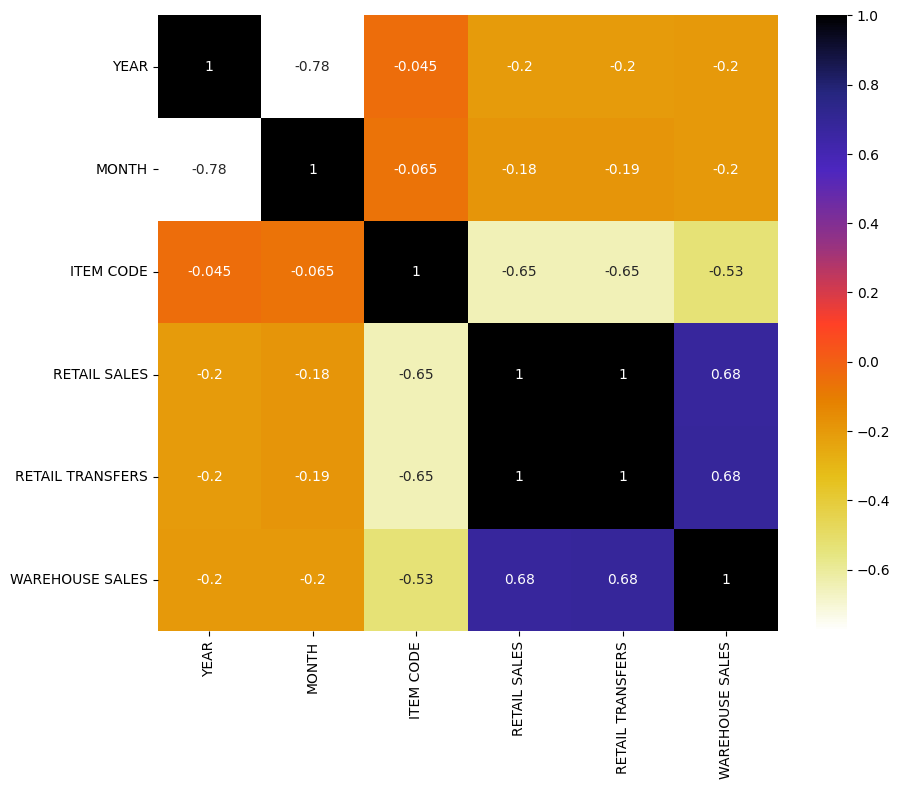

In [76]:

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(),cmap=('CMRmap_r'),annot=True)

plt.savefig('Before Opreation Heatmap.png')
plt.show()
#files.download("Before Opreation Heatmap.png")

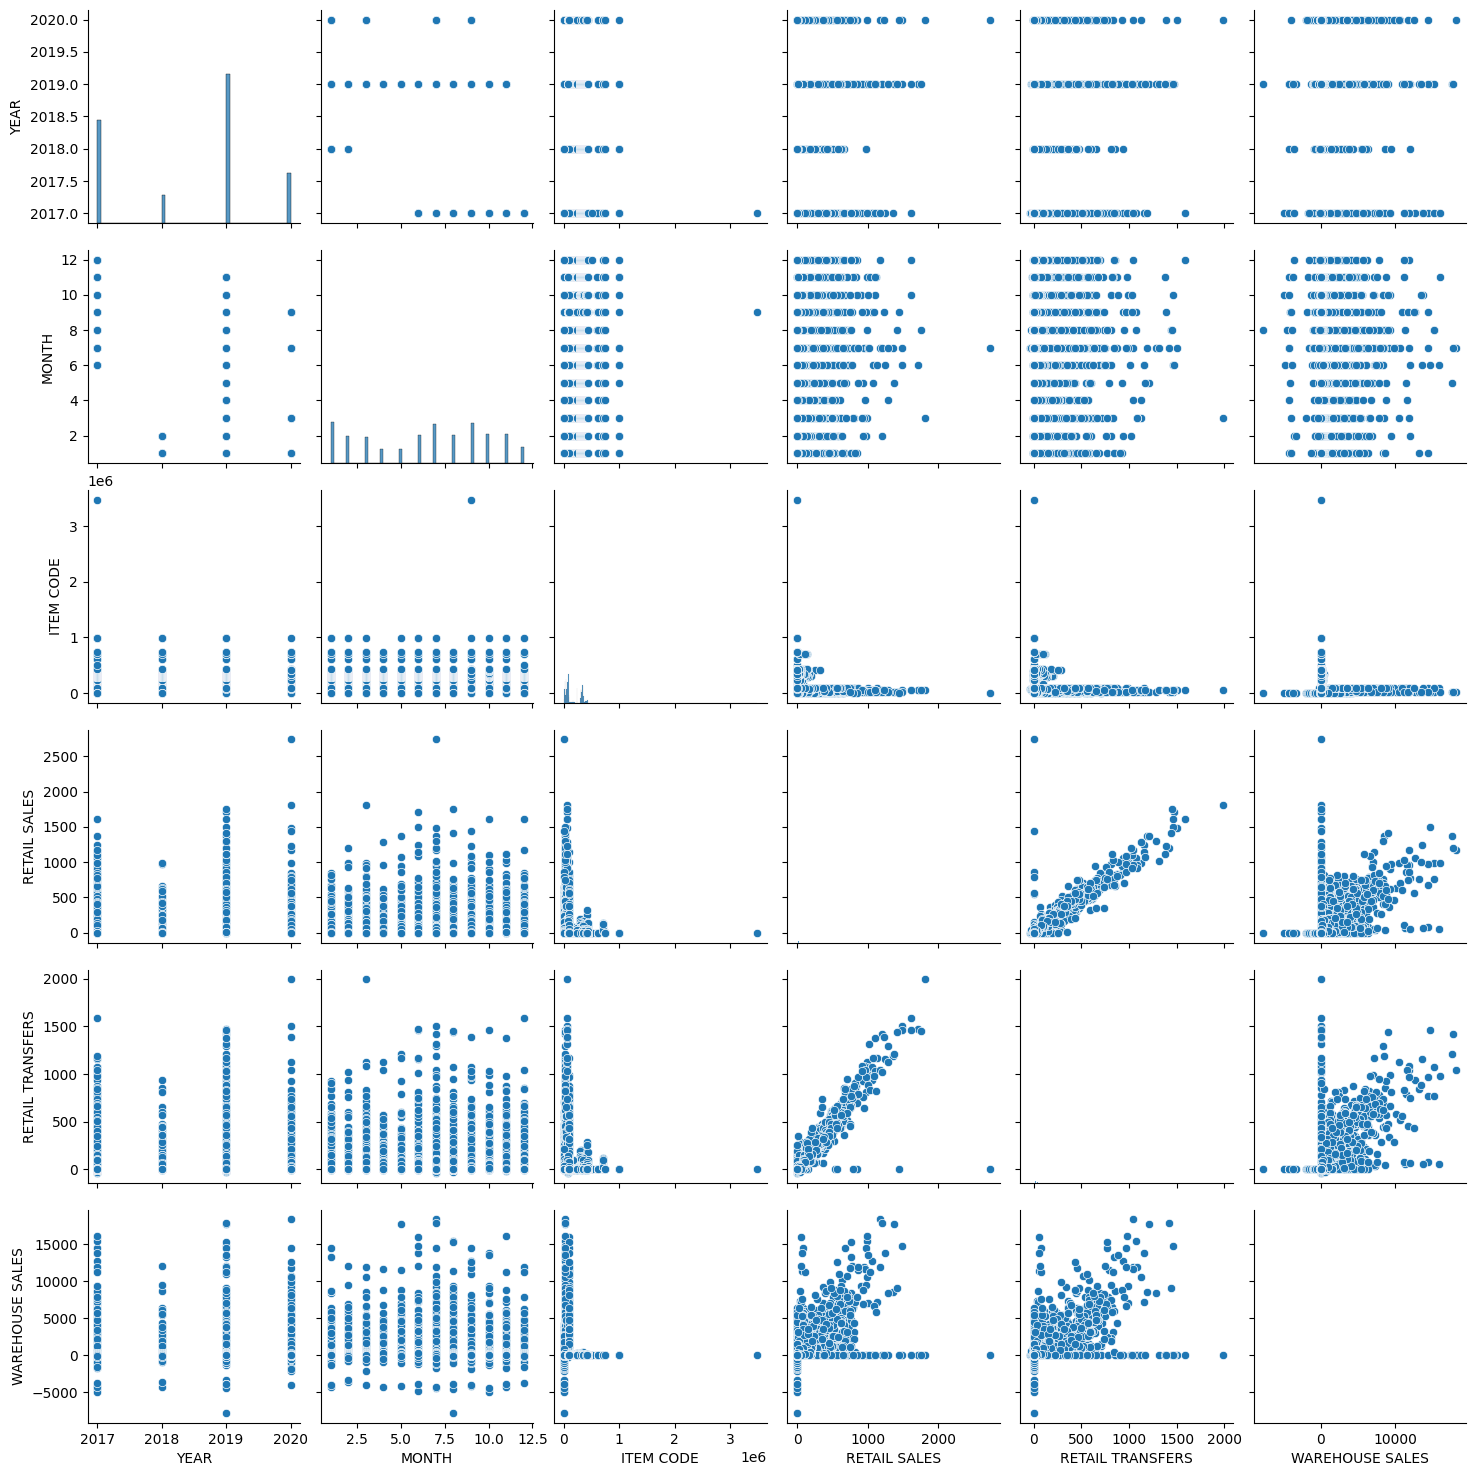

In [77]:
# Select only numerical columns
numerical_cols = ex.select_dtypes(include=['number']).columns

# Create the scatter plot matrix
sns.pairplot(ex[numerical_cols])

plt.savefig(f'pairplot.jpg')
plt.show()
#files.download("pairplot.jpg")

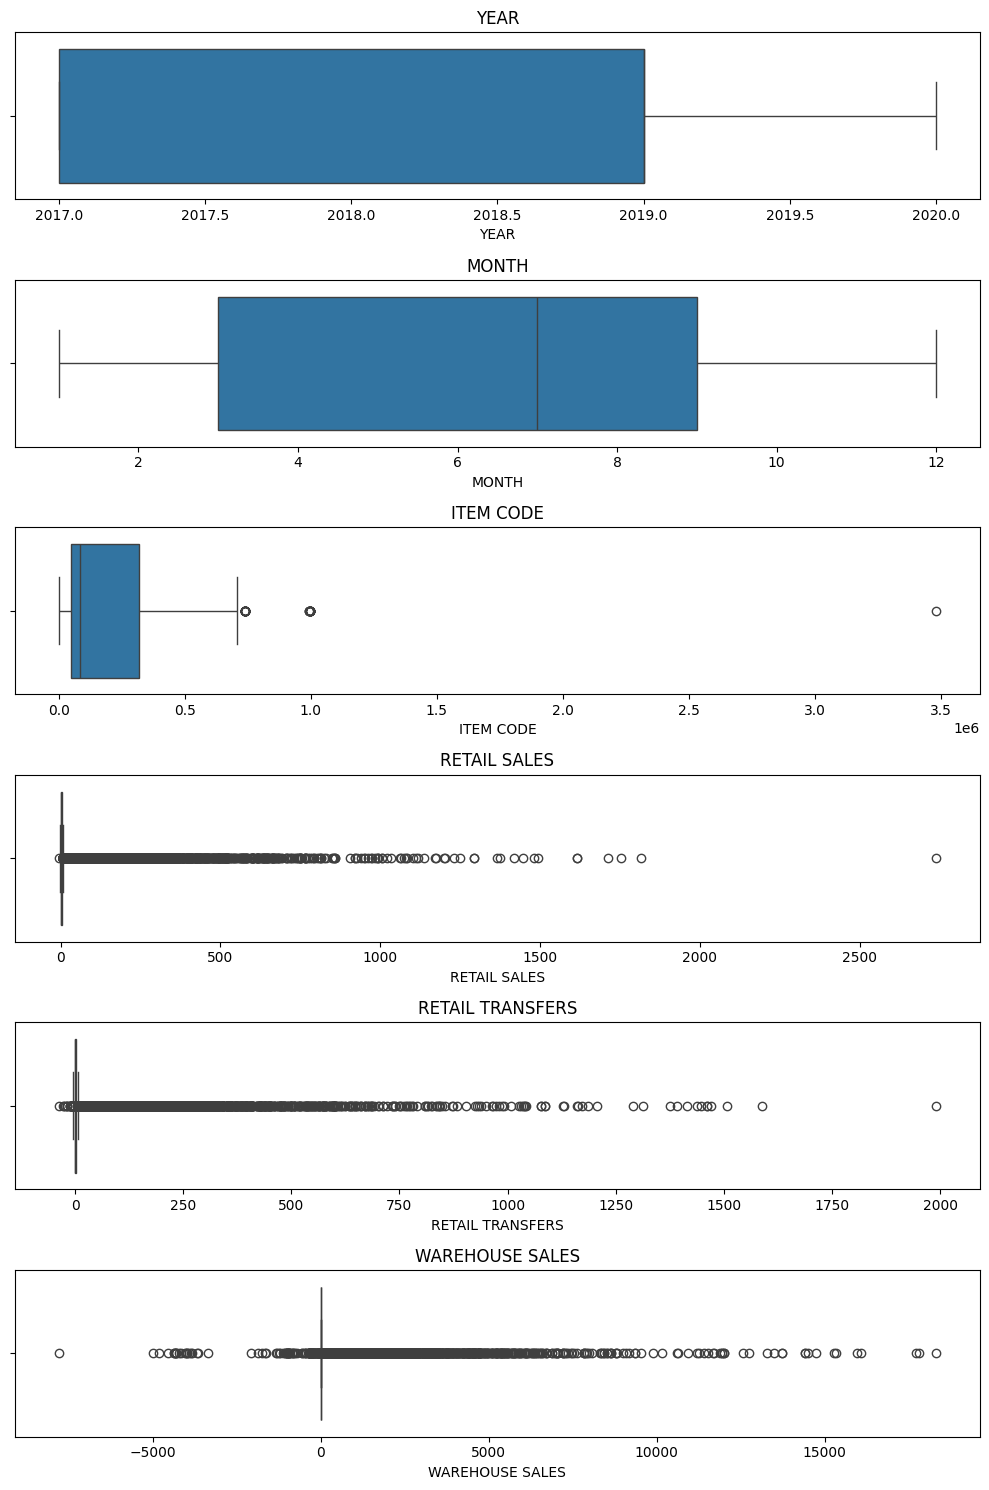

In [78]:

fig,axes=plt.subplots(nrows=len(numerical_cols),ncols=1, figsize=(10,15))

axes=axes.flatten()

for i,variable in enumerate(numerical_cols):
  sns.boxplot(x=ex[variable],ax=axes[i])
  axes[i].set_title(variable)


fig.tight_layout()

plt.savefig(f'checked outlier.jpg')
plt.show()
#files.download("checked outlier.jpg")

In [79]:
ex.describe()

,YEAR,MONTH,ITEM CODE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307645.000000,307645.000000,3.076450e+05,307645.000000,307645.000000,307645.000000
mean,2018.438525,6.423862,1.640895e+05,7.016252,6.940002,25.299228
std,1.083061,3.461812,1.361190e+05,30.993247,30.241207,249.923950
min,2017.000000,1.000000,2.000000e+00,-6.000000,-38.000000,-7800.000000
25%,2017.000000,3.000000,4.809200e+04,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,8.401200e+04,0.000000,0.000000,1.000000
75%,2019.000000,9.000000,3.180820e+05,3.000000,3.000000,5.000000
max,2020.000000,12.000000,3.480003e+06,2739.000000,1991.000000,18317.000000


In [80]:
ex[ex['WAREHOUSE SALES']<0]

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,BRAND NAME,QUANTITY,STD UNIT,NUMBER UNIT
405,2020,1,Default,1279,EMPTY WINE KEG - KEGS,DUNNAGE,0,0,-12,EMPTY WINE KEG KEGS,None,<NA>,<NA>
822,2020,1,PREMIUM DISTRIBUTORS INC,175,EMPTY 1/2 KEG (30.00),DUNNAGE,0,0,-3999,EMPTY 1,30.00,<NA>,<NA>
1011,2020,1,ANHEUSER BUSCH INC,205,EMPTY 1/6 KEG (30.00),DUNNAGE,0,0,-934,EMPTY 1,30.00,<NA>,<NA>
1552,2020,1,FIVE GRAPES LLC,236502,J DE TELMONT SANS SOUFRE AJOUTE BRUT CHAMP - 7...,WINE,0,0,-1,J DE TELMONT SANS SOUFRE AJOUTE BRUT CHAMP,750ML,750.0 ML,750 ML
2144,2020,1,LEGENDS LTD,25049,ERDINGER HEFE WEISSE 50L 1/2K,KEGS,0,0,-1,ERDINGER HEFE WEISSE 50L 1,2K,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304007,2020,9,YUENGLING BREWERY,51148,YUENGLING HERSHEY'S CHOCOLATE PORTER 1/2K,KEGS,0,0,-1,YUENGLING HERSHEY S CHOCOLATE PORTER 1,2K,<NA>,<NA>
304362,2020,9,DELMAR BREWING COMPANY LLC,62550,EVOLUTION BRUTALE IPA 1/2 KEG,KEGS,0,0,-1,EVOLUTION BRUTALE IPA 1,2 KEG,2.0 KEG,2 KEG
304826,2020,9,ANHEUSER BUSCH INC,68742,KONA ISLAND COLADA CREAM 1/6 KEG,KEGS,0,0,-1,KONA ISLAND COLADA CREAM 1,6 KEG,6.0 KEG,6 KEG
307376,2020,9,LEGENDS LTD,24150,OSKAR BLUES MAMAS YELLA PILS 1/2K,KEGS,0,0,-1,OSKAR BLUES MAMAS YELLA PILS 1,2K,<NA>,<NA>


In [81]:
ex['WAREHOUSE DISPATCH UNITS'] = ex['WAREHOUSE SALES'].apply(lambda x: x if x < 0 else 0)

In [82]:
ex['WAREHOUSE SALES'] = ex['WAREHOUSE SALES'].apply(lambda x: x if x > 0 else 0)

In [83]:
ex['WAREHOUSE DISPATCH UNITS'] = ex['WAREHOUSE DISPATCH UNITS'].abs() # Remove negative signs by converting to absolute values

In [84]:
ex[ex['RETAIL SALES']<0]

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,BRAND NAME,QUANTITY,STD UNIT,NUMBER UNIT,WAREHOUSE DISPATCH UNITS
44053,2017,6,MHW LTD,414050,FEUDI D'ALBE MONTEPUL D'ABRU - 750ML,WINE,-1,6,15,FEUDI D ALBE MONTEPUL D ABRU,750ML,750.0 ML,750 ML,0
46032,2017,6,DIAGEO NORTH AMERICA INC,68675,CROWN ROYAL XTRA RARE 6/CS - 750ML,LIQUOR,-2,0,0,CROWN ROYAL XTRA RARE 6 CS,750ML,750.0 ML,750 ML,0
46770,2017,6,A VINTNERS SELECTIONS,72373,STONEWALL RUM - 750ML,LIQUOR,-2,0,0,STONEWALL RUM,750ML,750.0 ML,750 ML,0
48223,2017,6,KYSELA PERE ET FILS LTD,83432,KEERMONT RED BLEND '12,WINE,-6,0,0,KEERMONT RED BLEND,12,<NA>,<NA>,0
60504,2017,7,PERNOD RICARD USA LLC,78824,LONGMORN 16YR - 750ML,LIQUOR,-1,0,0,LONGMORN 16YR,750ML,750.0 ML,750 ML,0
69178,2017,8,JACKSON FAMILY ENTERPRISES INC,342450,K JACKSON AVANT RED BLEND - 750ML,WINE,-2,0,0,K JACKSON AVANT RED BLEND,750ML,750.0 ML,750 ML,0
79588,2017,9,TRI-VIN IMPORTS,307920,WEREWOLF CAB - 750ML,WINE,-1,0,4,WEREWOLF CAB,750ML,750.0 ML,750 ML,0
106518,2017,11,A VINTNERS SELECTIONS,304127,ANGELINE RES MER - 750ML,WINE,-1,0,15,ANGELINE RES MER,750ML,750.0 ML,750 ML,0
109355,2017,11,DEUTSCH FAMILY WINE & SPIRITS,335696,BIB & TUCKER BOURBON - 750ML,LIQUOR,-1,0,0,BIB TUCKER BOURBON,750ML,750.0 ML,750 ML,0
113724,2017,11,PATERNO IMPORTS LTD,53007,SANFORD SANTA RITA HILLS CHARD -750ML,WINE,-1,0,0,SANFORD SANTA RITA HILLS CHARD,750ML,750.0 ML,750 ML,0


In [85]:
ex['RETURN']=ex['RETAIL SALES'].apply(lambda x: x if x < 0 else 0)

In [86]:
ex['RETAIL SALES']=ex['RETAIL SALES'].apply(lambda x : x if x > 0 else 0)

In [87]:
ex['RETURN']=ex['RETURN'].abs()

In [88]:
# Treating positive and Negative values
ex[ex['RETAIL TRANSFERS']<0]

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,BRAND NAME,QUANTITY,STD UNIT,NUMBER UNIT,WAREHOUSE DISPATCH UNITS,RETURN
2215,2020,1,NORTH LOCK LLC DBA PORT CITY BREWING CO,25738,PORT CITY MONUMENTAL IPA 4/6 12 OZ,BEER,3,-1,17,PORT CITY MONUMENTAL IPA 4,6 12 OZ,12.0 OZ,12 OZ,0,0
6659,2020,1,JACK POUST & COMPANY INC,40088,PRESIDENTIAL LBV PORT 6/CS - 750ML,WINE,1,-2,0,PRESIDENTIAL LBV PORT 6 CS,750ML,750.0 ML,750 ML,0,0
9644,2020,1,STEFANO INCORPORATED,70941,EFE RAKI GREEN LABEL - 750ML,LIQUOR,1,-2,0,EFE RAKI GREEN LABEL,750ML,750.0 ML,750 ML,0,0
11153,2020,1,BROWN-FORMAN BEVERAGES WORLDWIDE,84089,KORBEL ORGANIC BRUT CHAMPAGNE - 750ML,WINE,1,-3,0,KORBEL ORGANIC BRUT CHAMPAGNE,750ML,750.0 ML,750 ML,0,0
11696,2020,1,SAZERAC CO,92140,FIREBALL CINNAMON WHISKY PET - 1.75L,LIQUOR,2,-1,0,FIREBALL CINNAMON WHISKY PET,1.75L,1.75 L,1.75 L,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291487,2019,11,RELIABLE CHURCHILL LLLP,39705,LITTLE PENGUIN SHZ - 1.5L,WINE,3,-1,0,LITTLE PENGUIN SHZ,1.5L,1.5 L,1.5 L,0,0
293084,2019,11,DEUTSCH FAMILY WINE & SPIRITS,50903,VILLA MASSA LIMONI - 750ML,LIQUOR,8,-1,0,VILLA MASSA LIMONI,750ML,750.0 ML,750 ML,0,0
293596,2019,11,BACARDI USA INC,62227,GREY GOOSE VODKA - 50ML,LIQUOR,2,-20,0,GREY GOOSE VODKA,50ML,50.0 ML,50 ML,0,0
297121,2019,11,DOGFISH HEAD CRAFT BREWERY LLC,99023,DOGFISH HEAD PUNKIN ALE 4/6 NR - 12OZ,BEER,5,-3,3,DOGFISH HEAD PUNKIN ALE 4,12OZ,12.0 OZ,12 OZ,0,0


In [89]:
ex['TRANSFERS RETURN']=ex['RETAIL TRANSFERS'].apply(lambda x : x if x < 0 else 0)

In [90]:
ex['RETAIL TRANSFERS']=ex['RETAIL TRANSFERS'].apply(lambda x : x if x > 0 else 0)

In [91]:
ex['TRANSFERS RETURN']=ex['TRANSFERS RETURN'].abs()

In [92]:
ex[ex['TRANSFERS RETURN']>0]

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,BRAND NAME,QUANTITY,STD UNIT,NUMBER UNIT,WAREHOUSE DISPATCH UNITS,RETURN,TRANSFERS RETURN
2215,2020,1,NORTH LOCK LLC DBA PORT CITY BREWING CO,25738,PORT CITY MONUMENTAL IPA 4/6 12 OZ,BEER,3,0,17,PORT CITY MONUMENTAL IPA 4,6 12 OZ,12.0 OZ,12 OZ,0,0,1
6659,2020,1,JACK POUST & COMPANY INC,40088,PRESIDENTIAL LBV PORT 6/CS - 750ML,WINE,1,0,0,PRESIDENTIAL LBV PORT 6 CS,750ML,750.0 ML,750 ML,0,0,2
9644,2020,1,STEFANO INCORPORATED,70941,EFE RAKI GREEN LABEL - 750ML,LIQUOR,1,0,0,EFE RAKI GREEN LABEL,750ML,750.0 ML,750 ML,0,0,2
11153,2020,1,BROWN-FORMAN BEVERAGES WORLDWIDE,84089,KORBEL ORGANIC BRUT CHAMPAGNE - 750ML,WINE,1,0,0,KORBEL ORGANIC BRUT CHAMPAGNE,750ML,750.0 ML,750 ML,0,0,3
11696,2020,1,SAZERAC CO,92140,FIREBALL CINNAMON WHISKY PET - 1.75L,LIQUOR,2,0,0,FIREBALL CINNAMON WHISKY PET,1.75L,1.75 L,1.75 L,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291487,2019,11,RELIABLE CHURCHILL LLLP,39705,LITTLE PENGUIN SHZ - 1.5L,WINE,3,0,0,LITTLE PENGUIN SHZ,1.5L,1.5 L,1.5 L,0,0,1
293084,2019,11,DEUTSCH FAMILY WINE & SPIRITS,50903,VILLA MASSA LIMONI - 750ML,LIQUOR,8,0,0,VILLA MASSA LIMONI,750ML,750.0 ML,750 ML,0,0,1
293596,2019,11,BACARDI USA INC,62227,GREY GOOSE VODKA - 50ML,LIQUOR,2,0,0,GREY GOOSE VODKA,50ML,50.0 ML,50 ML,0,0,20
297121,2019,11,DOGFISH HEAD CRAFT BREWERY LLC,99023,DOGFISH HEAD PUNKIN ALE 4/6 NR - 12OZ,BEER,5,0,3,DOGFISH HEAD PUNKIN ALE 4,12OZ,12.0 OZ,12 OZ,0,0,3


In [93]:
ex[ex['RETAIL SALES']==2739]

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,BRAND NAME,QUANTITY,STD UNIT,NUMBER UNIT,WAREHOUSE DISPATCH UNITS,RETURN,TRANSFERS RETURN
12941,2020,7,Default,2,ICE,NON-ALCOHOL,2739,0,0,ICE,None,<NA>,<NA>,0,0,0


In [94]:
ex[ex['RETAIL TRANSFERS']==1991]

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,BRAND NAME,QUANTITY,STD UNIT,NUMBER UNIT,WAREHOUSE DISPATCH UNITS,RETURN,TRANSFERS RETURN
32070,2020,3,FIFTH GENERATION INC,53929,TITO'S HANDMADE VODKA - 1.75L,LIQUOR,1816,1991,10,TITO S HANDMADE VODKA,1.75L,1.75 L,1.75 L,0,0,0


In [95]:
ex[ex['WAREHOUSE SALES'] == 18317]

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,BRAND NAME,QUANTITY,STD UNIT,NUMBER UNIT,WAREHOUSE DISPATCH UNITS,RETURN,TRANSFERS RETURN
13281,2020,7,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,1174,1041,18317,CORONA EXTRA LOOSE NR,12OZ,12.0 OZ,12 OZ,0,0,0


In [96]:
ex[numerical_cols].skew()

,0
YEAR,-0.225462
MONTH,-0.180377
ITEM CODE,0.536139
RETAIL SALES,19.409170
RETAIL TRANSFERS,17.380937
WAREHOUSE SALES,30.363283


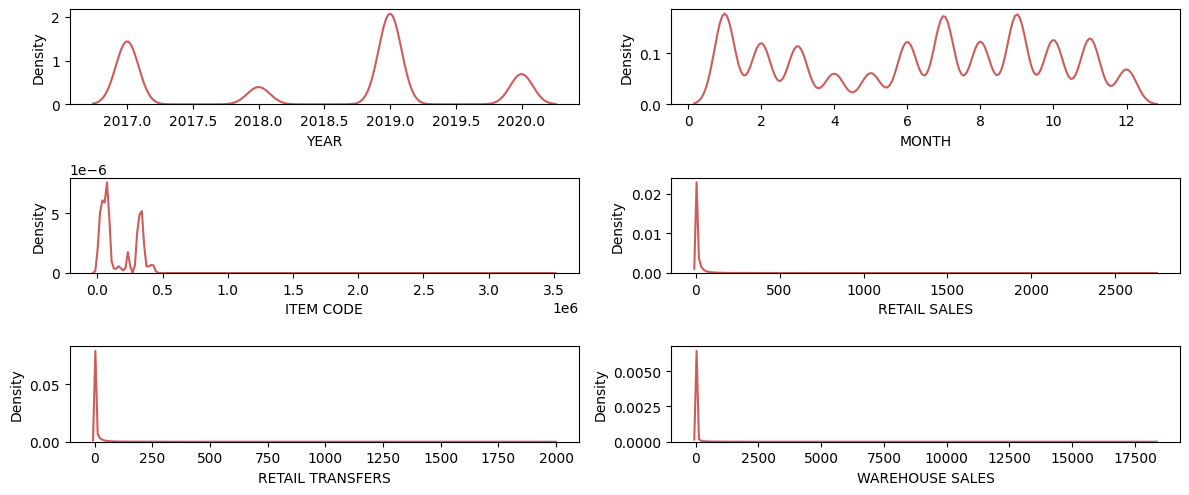

In [97]:
# distribution of data before scaling
plt.figure(figsize=(12, 8))
for i, col in enumerate(ex[numerical_cols]):
    plt.subplot(5, 2, i+1)
    sns.kdeplot(x=ex[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()
plt.savefig(f'distribution of data before scaling.jpg')
plt.show()
#files.download("distribution of data before scaling.jpg")

####RETAIL_SALES VS RETAIL_TRANSFRES

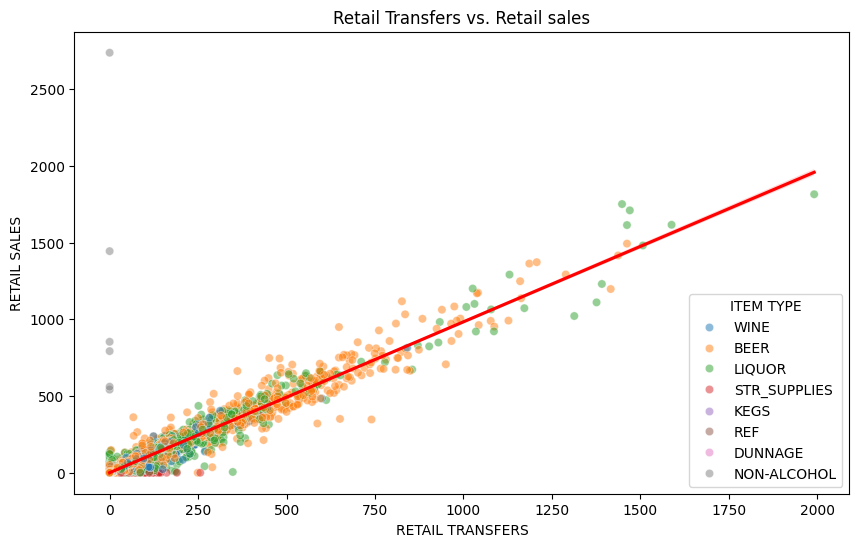

In [98]:
# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.scatterplot(x='RETAIL TRANSFERS', y='RETAIL SALES', data=ex, hue='ITEM TYPE', alpha=0.5)

# Customize the plot
plt.title('Retail Transfers vs. Retail sales')
plt.xlabel('Retail Transfers')
plt.ylabel('Retail sales')

# Add a regression line (optional, but helpful to see trends)
sns.regplot(x='RETAIL TRANSFERS', y='RETAIL SALES', data=ex, scatter=False, color='red')

plt.savefig(f'Before Treat outliears Retail Transfers VS Retail Sales.jpg')
plt.show()
#files.download("Before Treat outliears Retail Transfers VS Retail Sales.jpg")

####RETAIL_SALES VS WAREHOUSE_SALES

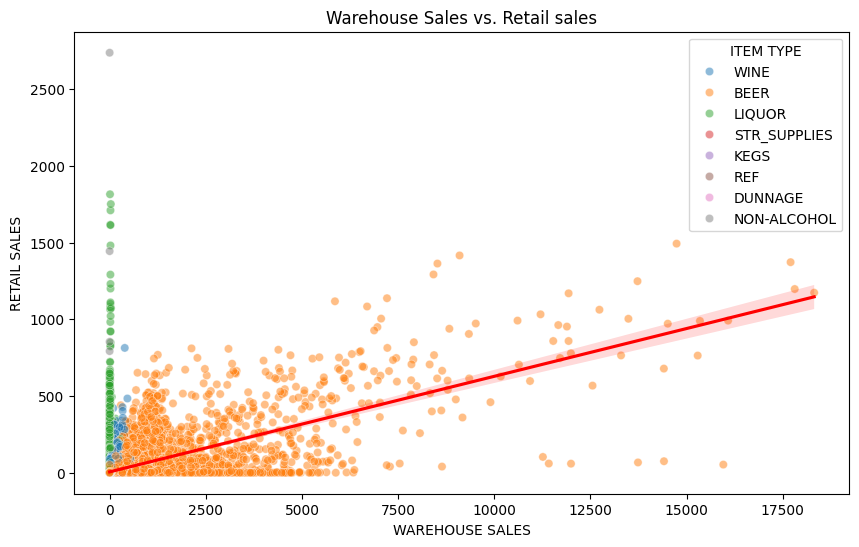

In [99]:
# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.scatterplot(x='WAREHOUSE SALES', y='RETAIL SALES', data=ex, hue='ITEM TYPE', alpha=0.5)  # Add hue for item type

# Customize the plot
plt.title('Warehouse Sales vs. Retail sales')
plt.xlabel('Warehouse Sales')
plt.ylabel('Retail sales')

# Add a regression line (optional, but helpful to see trends)
sns.regplot(x='WAREHOUSE SALES', y='RETAIL SALES', data=ex, scatter=False, color='red')
plt.savefig(f'Before Treat Outlier Warehouse_Sales VS Retail Sales.jpg')
plt.show()
#files.download("Before Treat Outlier Warehouse_Sales VS Retail Sales.jpg")

####Retail Transfers VS Warehouse Sales

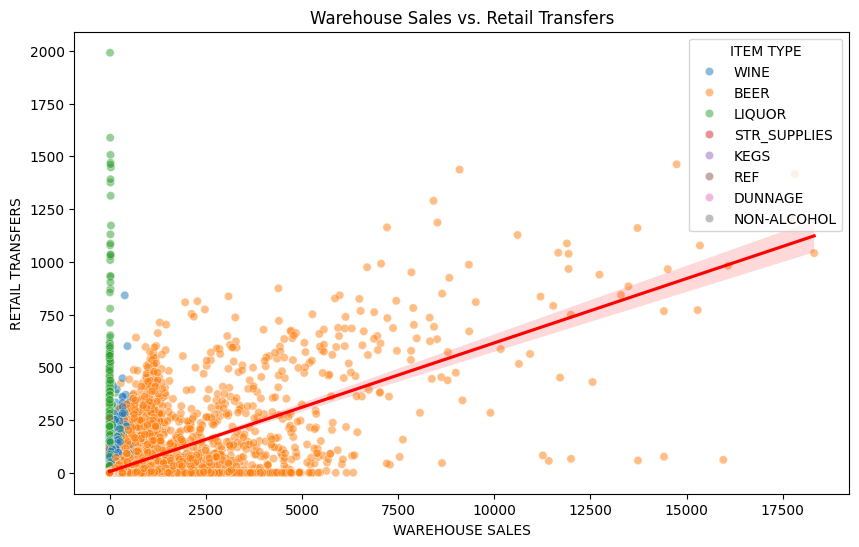

In [100]:
# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.scatterplot(x='WAREHOUSE SALES', y='RETAIL TRANSFERS', data=ex, hue='ITEM TYPE', alpha=0.5)  # Add hue for item type

# Customize the plot
plt.title('Warehouse Sales vs. Retail Transfers')
plt.xlabel('Warehouse Sales')
plt.ylabel('Retail Transfers')

# Add a regression line (optional, but helpful to see trends)
sns.regplot(x='WAREHOUSE SALES', y='RETAIL TRANSFERS', data=ex, scatter=False, color='red')

plt.savefig(f'Before Treat Outlier Warehouse_Sales VS Retail Transfers.jpg')
plt.show()
#files.download("Before Treat Outlier Warehouse_Sales VS Retail Transfers.jpg")

#### MONTHS VS RETAIL_SALES

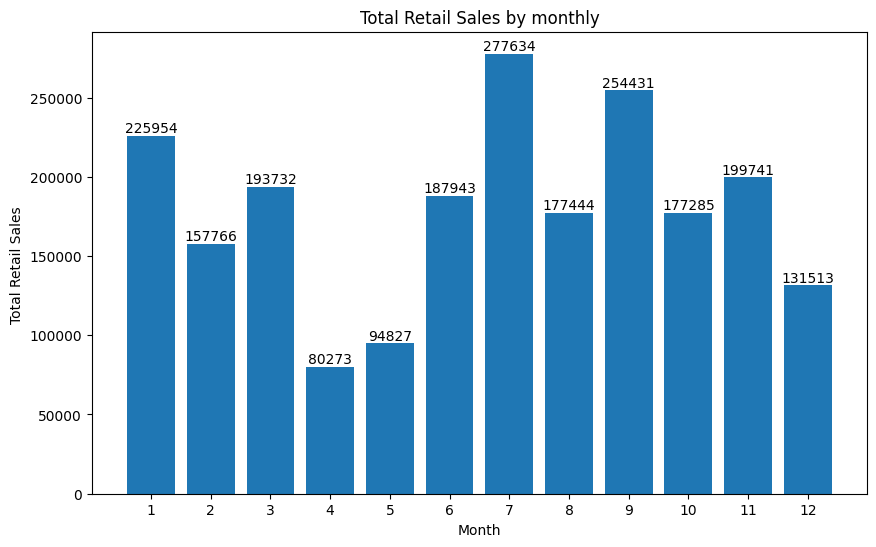

In [101]:
# Group data by monthly and sum retail sales
monthly_sales = ex.groupby('MONTH')['RETAIL SALES'].sum().reset_index()

# Calculate total sales across all monthly
total_sales = monthly_sales['RETAIL SALES'].sum()

# Create the histogram with percentage labels
plt.figure(figsize=(10, 6))
plt.subplot(1,1,1) # Corrected subplot declaration
# Use monthly_sales DataFrame instead of yearly_sales for x and y values
bars = plt.bar(monthly_sales['MONTH'], monthly_sales['RETAIL SALES'])
plt.title('Total Retail Sales by monthly')
plt.xlabel('Month')
plt.ylabel('Total Retail Sales ')
plt.xticks(monthly_sales['MONTH'])  # Set x-axis ticks to month

# add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')
    # Adjust 'yval + 5' for label position

plt.savefig(f'Total Retail Sales by monthly.jpg')
plt.show()
#files.download("Total Retail Sales by monthly.jpg")

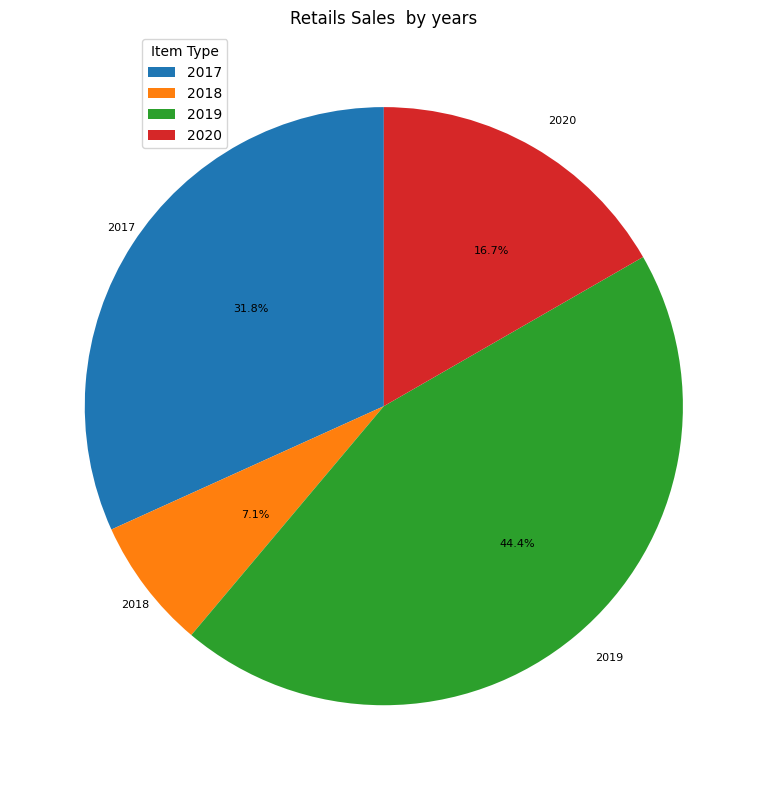

In [102]:
#'YEAR' and sum 'RETAIL TRANSFERS'
transfers_by_year=ex.groupby('YEAR')['RETAIL SALES'].sum()

#calculate the pie chart values
pie_values_postive = transfers_by_year.values

#create a figure with two subplots arranged horizontally
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))

# Create the  pie chart
wedges, texts, autotexts=ax1.pie(pie_values_postive, labels=transfers_by_year.index, autopct='%1.1f%%', startangle=90,
        textprops={'fontsize': 8, 'rotation_mode':'anchor','ha':'left'}) # Adjust the label

ax1.set_title('Retails Sales  by years')

# Add legends for both pie charts
ax1.legend(wedges, transfers_by_year.index, title="Item Type", loc="best", bbox_to_anchor=(-0.2, 0, 0.5, 1))


# adjust spacing between subplots
plt.tight_layout()

plt.savefig(f'Retails Sales by years.jpg')
plt.show()
#files.download("Retails Sales by years.jpg")

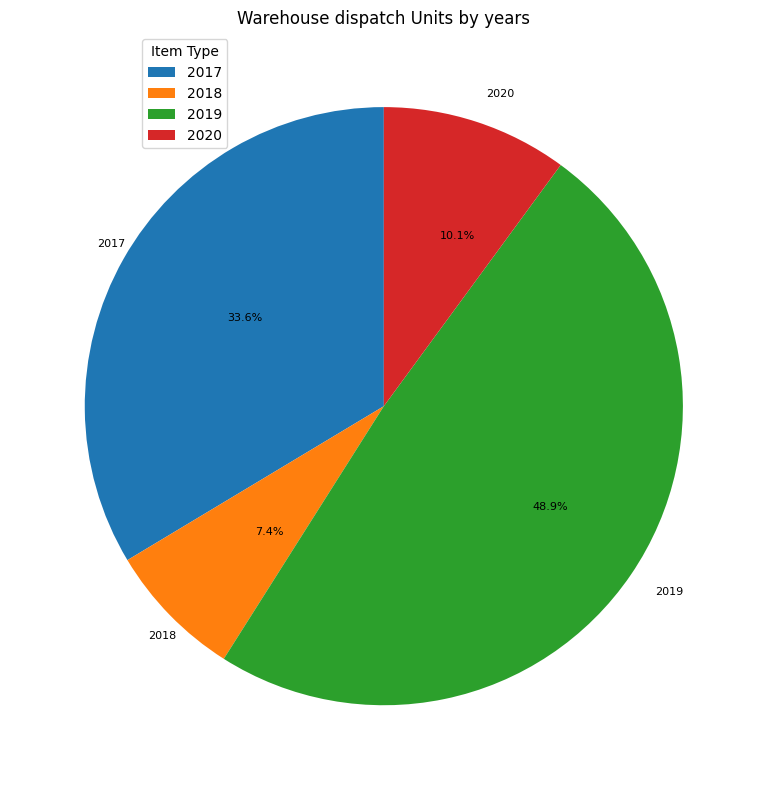

In [103]:
#'YEAR' and sum 'WAREHOUSE DISPATCH UNITS'
transfers_by_year=ex.groupby('YEAR')['WAREHOUSE DISPATCH UNITS'].sum()

#calculate the pie chart values
pie_values_postive = transfers_by_year.values

#create a figure with two subplots arranged horizontally
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))

# Create the  pie chart
wedges, texts, autotexts=ax1.pie(pie_values_postive, labels=transfers_by_year.index, autopct='%1.1f%%', startangle=90,
        textprops={'fontsize': 8, 'rotation_mode':'anchor','ha':'left'}) # Adjust the label

ax1.set_title('Warehouse dispatch Units by years')

# Add legends for both pie charts
ax1.legend(wedges, transfers_by_year.index, title="Item Type", loc="best", bbox_to_anchor=(-0.2, 0, 0.5, 1))


# adjust spacing between subplots
plt.tight_layout()

plt.savefig(f'Warehouse dispatch Units by years.jpg')
plt.show()
#files.download("Warehouse dispatch Units by years.jpg")

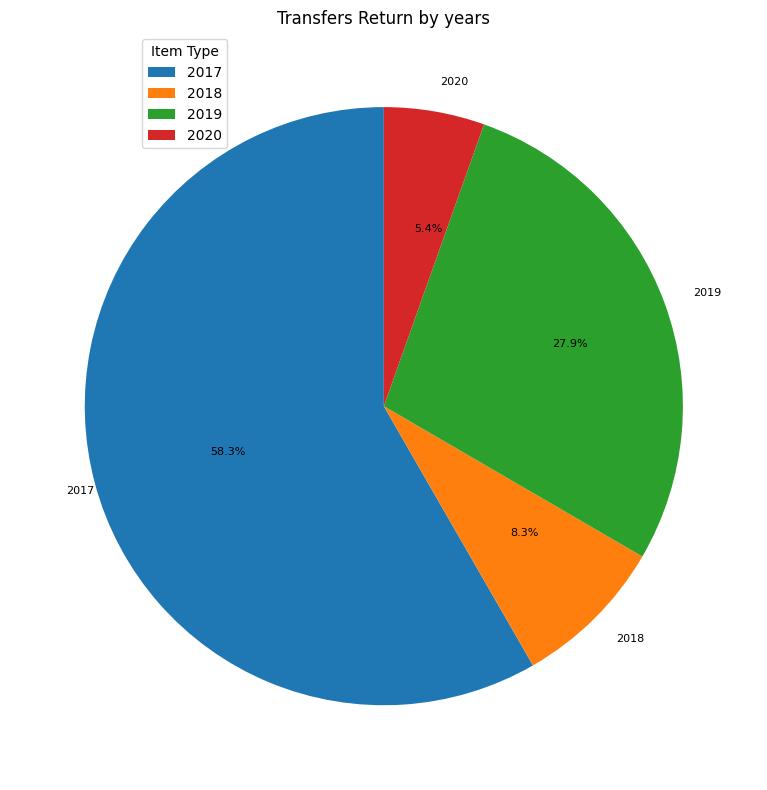

In [104]:
#'YEAR' and sum 'TRANSFERS RETURN'
transfers_by_year=ex.groupby('YEAR')['TRANSFERS RETURN'].sum()

#calculate the pie chart values
pie_values_postive = transfers_by_year.values

#create a figure with two subplots arranged horizontally
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))

# Create the  pie chart
wedges, texts, autotexts=ax1.pie(pie_values_postive, labels=transfers_by_year.index, autopct='%1.1f%%', startangle=90,
        textprops={'fontsize': 8, 'rotation_mode':'anchor','ha':'left'}) # Adjust the label

ax1.set_title('Transfers Return by years')

# Add legends for both pie charts
ax1.legend(wedges, transfers_by_year.index, title="Item Type", loc="best", bbox_to_anchor=(-0.2, 0, 0.5, 1))


# adjust spacing between subplots
plt.tight_layout()

plt.savefig(f'Transfers Return by years.jpg')
plt.show()
#files.download("Transfers Return by years.jpg")

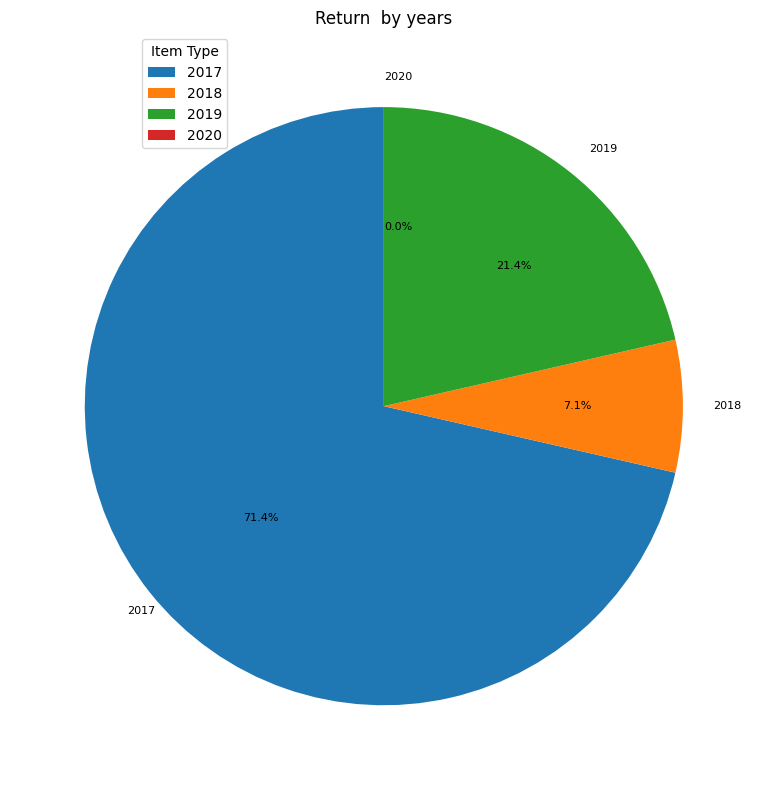

In [105]:
#'YEAR' and sum 'RETURN'
transfers_by_year=ex.groupby('YEAR')['RETURN'].sum()

#calculate the pie chart values
pie_values_postive = transfers_by_year.values

#create a figure with two subplots arranged horizontally
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))

# Create the  pie chart
wedges, texts, autotexts=ax1.pie(pie_values_postive, labels=transfers_by_year.index, autopct='%1.1f%%', startangle=90,
        textprops={'fontsize': 8, 'rotation_mode':'anchor','ha':'left'}) # Adjust the label

ax1.set_title('Return  by years')

# Add legends for both pie charts
ax1.legend(wedges, transfers_by_year.index, title="Item Type", loc="best", bbox_to_anchor=(-0.2, 0, 0.5, 1))


# adjust spacing between subplots
plt.tight_layout()

plt.savefig(f'Return by years.jpg')
plt.show()
#files.download("Return by years.jpg")

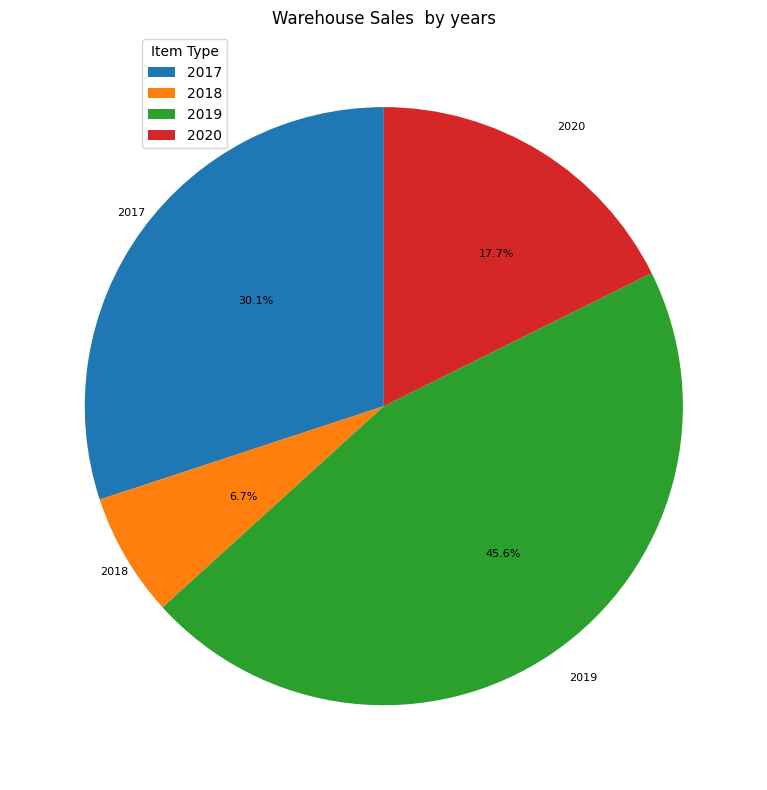

In [106]:
#'YEAR' and sum 'WAREHOUSE SALES'
transfers_by_year=ex.groupby('YEAR')['WAREHOUSE SALES'].sum()

#calculate the pie chart values
pie_values_postive = transfers_by_year.values

#create a figure with two subplots arranged horizontally
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))

# Create the  pie chart
wedges, texts, autotexts=ax1.pie(pie_values_postive, labels=transfers_by_year.index, autopct='%1.1f%%', startangle=90,
        textprops={'fontsize': 8, 'rotation_mode':'anchor','ha':'left'}) # Adjust the label

ax1.set_title('Warehouse Sales  by years')

# Add legends for both pie charts
ax1.legend(wedges, transfers_by_year.index, title="Item Type", loc="best", bbox_to_anchor=(-0.2, 0, 0.5, 1))


# adjust spacing between subplots
plt.tight_layout()

plt.savefig(f'Warehouse Sales by years.jpg')
plt.show()
#files.download("Warehouse Sales by years.jpg")

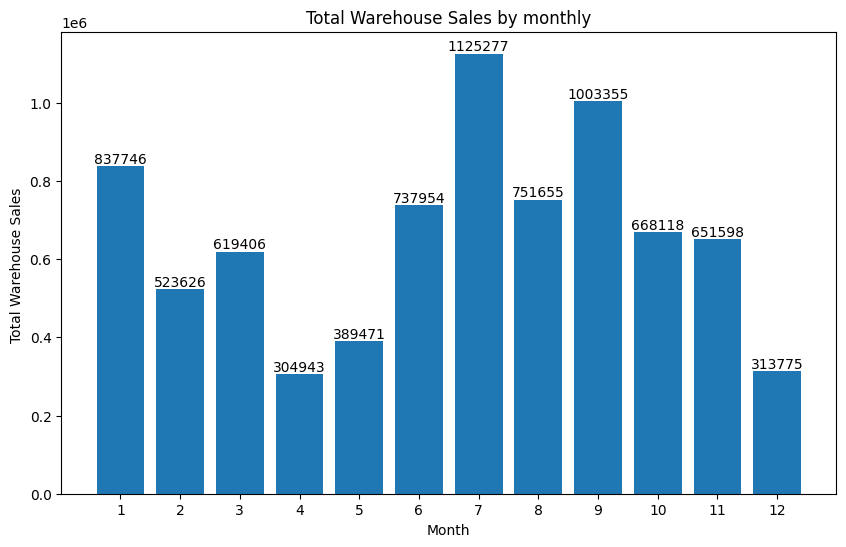

In [107]:
# Group data by monthly and sum retail sales
monthly_sales = ex.groupby('MONTH')['WAREHOUSE SALES'].sum().reset_index()

# Calculate total sales across all monthly
total_sales = monthly_sales['WAREHOUSE SALES'].sum()

# Create the histogram with percentage labels
plt.figure(figsize=(10, 6))
plt.subplot(1,1,1) # Corrected subplot declaration
# Use monthly_sales DataFrame instead of yearly_sales for x and y values
bars = plt.bar(monthly_sales['MONTH'], monthly_sales['WAREHOUSE SALES'])
plt.title('Total Warehouse Sales by monthly')
plt.xlabel('Month')
plt.ylabel('Total Warehouse Sales ')
plt.xticks(monthly_sales['MONTH'])  # Set x-axis ticks to month

# add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')
    # Adjust 'yval + 5' for label position

plt.savefig(f'Total Warehouse Sales by monthly.jpg')
plt.show()
#files.download("Total Warehouse Sales by monthly.jpg")

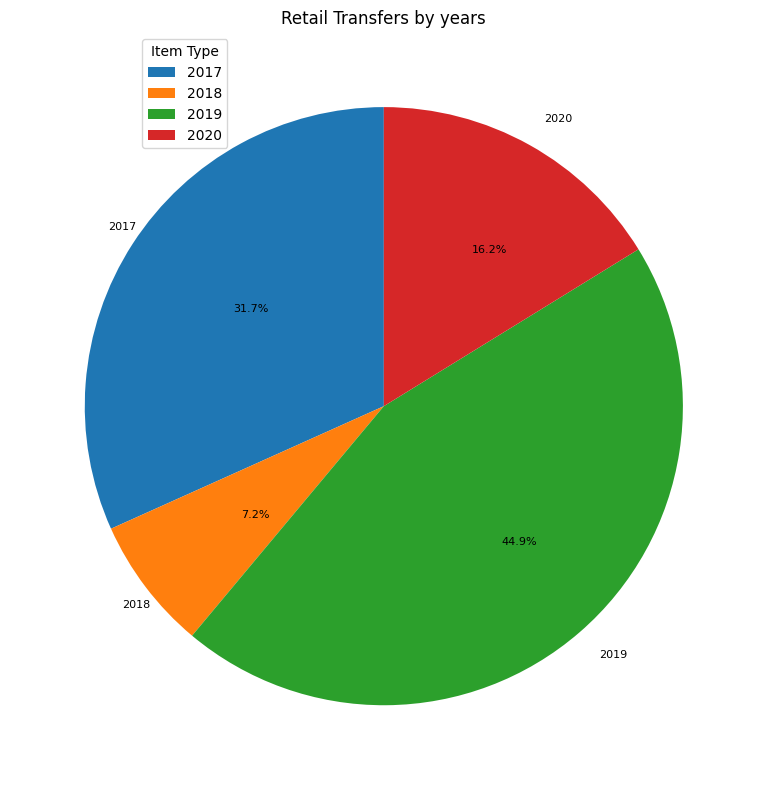

In [108]:
#'YEAR' and sum 'RETAIL TRANSFERS'
transfers_by_year=ex.groupby('YEAR')['RETAIL TRANSFERS'].sum()

#calculate the pie chart values
pie_values_postive = transfers_by_year.values

#create a figure with two subplots arranged horizontally
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))

# Create the  pie chart
wedges, texts, autotexts=ax1.pie(pie_values_postive, labels=transfers_by_year.index, autopct='%1.1f%%', startangle=90,
        textprops={'fontsize': 8, 'rotation_mode':'anchor','ha':'left'}) # Adjust the label

ax1.set_title('Retail Transfers by years')

# Add legends for both pie charts
ax1.legend(wedges, transfers_by_year.index, title="Item Type", loc="best", bbox_to_anchor=(-0.2, 0, 0.5, 1))


# adjust spacing between subplots
plt.tight_layout()

plt.savefig(f'Retail Transfers by years.jpg')
plt.show()
#files.download("Retail Transfers by years.jpg")

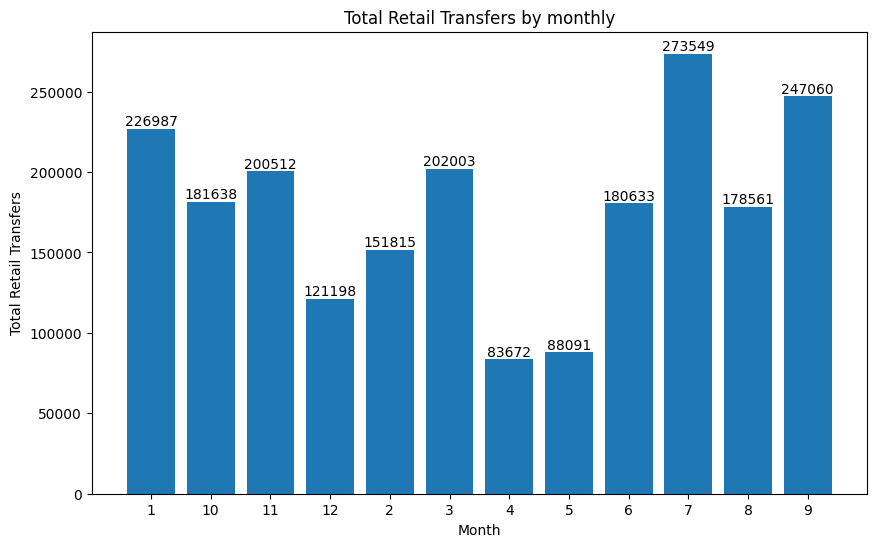

In [150]:
# Group data by monthly and sum retail sales
monthly_sales = ex.groupby('MONTH')['RETAIL TRANSFERS'].sum().reset_index()

# Calculate total sales across all monthly
total_sales = monthly_sales['RETAIL TRANSFERS'].sum()

# Create the histogram with percentage labels
plt.figure(figsize=(10, 6))
plt.subplot(1,1,1) # Corrected subplot declaration
# Use monthly_sales DataFrame instead of yearly_sales for x and y values
bars = plt.bar(monthly_sales['MONTH'], monthly_sales['RETAIL TRANSFERS'])
plt.title('Total Retail Transfers by monthly')
plt.xlabel('Month')
plt.ylabel('Total Retail Transfers')
plt.xticks(monthly_sales['MONTH'])  # Set x-axis ticks to month

# add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')
    # Adjust 'yval + 5' for label position
plt.savefig(f'Total Retail Transfers by monthly.jpg')
plt.show()
#files.download("Total Retail Transfers by monthly.jpg")

In [151]:
pv=ex.pivot_table(index='YEAR', columns='MONTH', values='RETAIL SALES', aggfunc='sum')
pv=pv.fillna(0)
print(pv)

MONTH        1       10        11        12        2         3        4  \
YEAR                                                                      
2017       0.0  89093.0   98158.0  131513.0      0.0       0.0      0.0   
2018   75668.0      0.0       0.0       0.0  77686.0       0.0      0.0   
2019   76021.0  88192.0  101583.0       0.0  80080.0   84329.0  80273.0   
2020   74265.0      0.0       0.0       0.0      0.0  109403.0      0.0   

MONTH        5        6        7        8        9  
YEAR                                                
2017       0.0  97208.0  92499.0  86925.0  90301.0  
2018       0.0      0.0      0.0      0.0      0.0  
2019   94827.0  90735.0  90656.0  90519.0  82027.0  
2020       0.0      0.0  94479.0      0.0  82103.0  


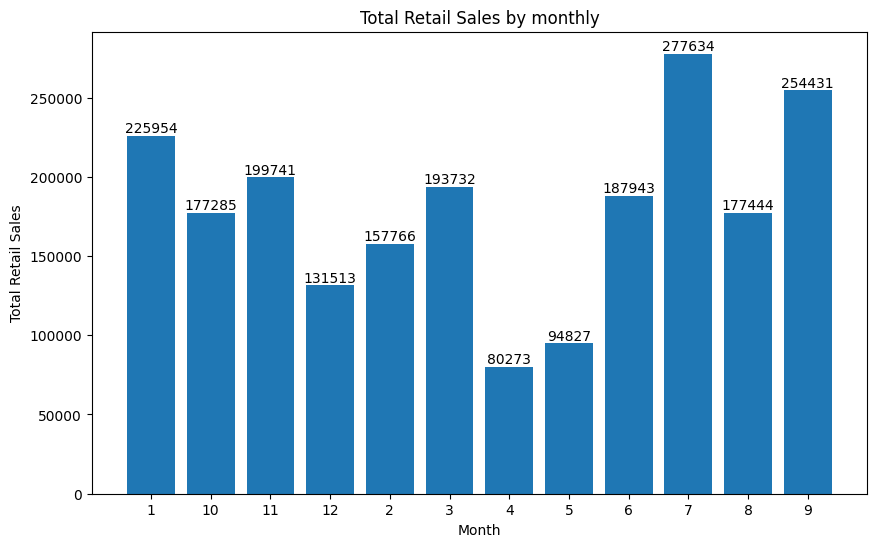

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [153]:
# Group data by monthly and sum retail sales
monthly_sales = ex.groupby('MONTH')['RETAIL SALES'].sum().reset_index()

# Calculate total sales across all monthly
total_sales = monthly_sales['RETAIL SALES'].sum()

# Create the histogram with percentage labels
plt.figure(figsize=(10, 6))
plt.subplot(1,1,1) # Corrected subplot declaration
# Use monthly_sales DataFrame instead of yearly_sales for x and y values
bars = plt.bar(monthly_sales['MONTH'], monthly_sales['RETAIL SALES'])
plt.title('Total Retail Sales by monthly')
plt.xlabel('Month')
plt.ylabel('Total Retail Sales')
plt.xticks(monthly_sales['MONTH'])  # Set x-axis ticks to month

# add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')
    # Adjust 'yval + 5' for label position
plt.savefig(f'Total Retail Sales by monthly.jpg')
plt.show()
files.download("Total Retail Transfers by monthly.jpg")

### Categoraical And Numerical columns

#### Retail Transfers
Definition: Movement of inventory from one retail location to another.


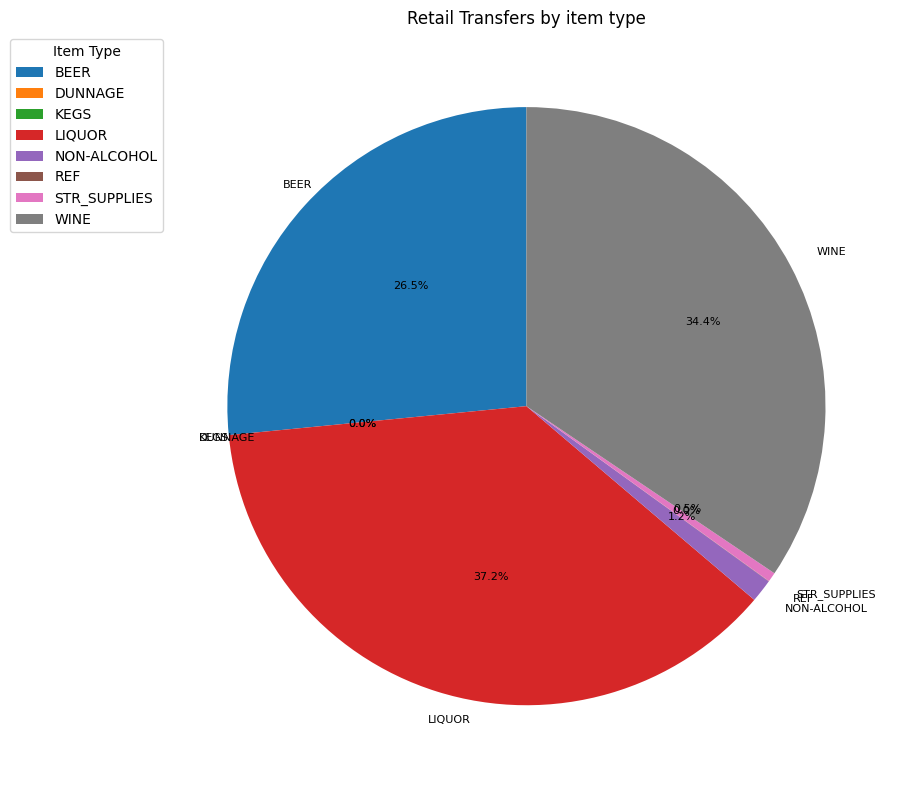

In [110]:
#'ITEM TYPE' and sum 'RETAIL TRANSFERS'
transfers_by_year=ex.groupby('ITEM TYPE')['RETAIL TRANSFERS'].sum()

#calculate the pie chart values
pie_values_postive = transfers_by_year.values

#create a figure with two subplots arranged horizontally
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))

# Create the  pie chart
wedges, texts, autotexts=ax1.pie(pie_values_postive, labels=transfers_by_year.index, autopct='%1.1f%%', startangle=90,
        textprops={'fontsize': 8, 'rotation_mode':'anchor','ha':'left'}) # Adjust the label

ax1.set_title('Retail Transfers by item type')

# Add legends for both pie charts
ax1.legend(wedges, transfers_by_year.index, title="Item Type", loc="best", bbox_to_anchor=(-0.2, 0, 0.5, 1))


# adjust spacing between subplots
plt.tight_layout()

plt.savefig(f'Retail Transfers by item type.jpg')
plt.show()
#files.download("Retail Transfers by item type.jpg")

####Warehouse Sales
Definition: Sales made directly from a warehouse rather than a retail store.


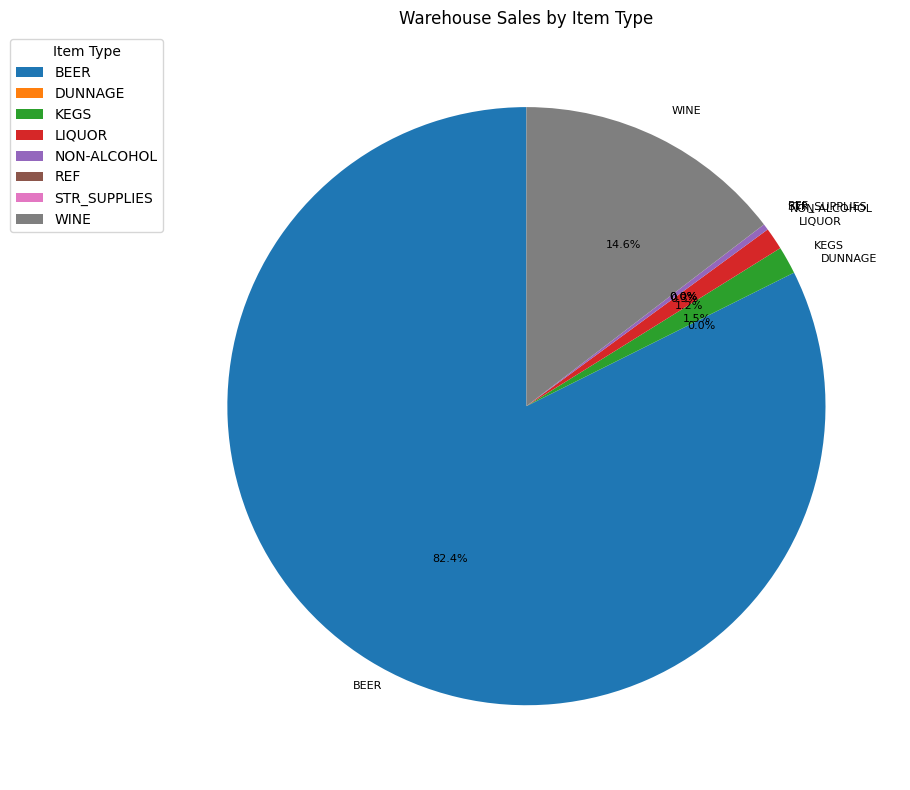

In [140]:
#'ITEM TYPE' and sum 'WAREHOUSE SALES'
transfers_by_year=ex.groupby('ITEM TYPE')['WAREHOUSE SALES'].sum()

#calculate the pie chart values
pie_values_postive = transfers_by_year.values

#create a figure with two subplots arranged horizontally
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))

# Create the  pie chart
wedges, texts, autotexts=ax1.pie(pie_values_postive, labels=transfers_by_year.index, autopct='%1.1f%%', startangle=90,
        textprops={'fontsize': 8, 'rotation_mode':'anchor','ha':'left'}) # Adjust the label

ax1.set_title('Warehouse Sales by Item Type')

# Add legends for both pie charts
ax1.legend(wedges, transfers_by_year.index, title="Item Type", loc="best", bbox_to_anchor=(-0.2, 0, 0.5, 1))


# adjust spacing between subplots
plt.tight_layout()

plt.savefig(f'Warehouse Sales by Item Type.jpg')
plt.show()
#files.download("Warehouse Sales by Item Type.jpg")

####NUMBER UNIT Vs ITEM TYPE

In [112]:
ex['NUMBER UNIT']=ex['NUMBER UNIT'].str.strip()
ex['NUMBER UNIT'] = ex['NUMBER UNIT'].str.replace(
    r'\b(CAN|C|CANSS|CN|CANSN)\b', 'CANS', case=False, regex=True)

ex['NUMBER UNIT']=ex['NUMBER UNIT'].str.replace(r'\b(LTR,MINI LTR)\b','L',case=False,regex=True)
ex['NUMBER UNIT']=ex['NUMBER UNIT'].str.replace(r'\b(MLSM)\b','ML',case=False,regex=True)
ex['NUMBER UNIT']=ex['NUMBER UNIT'].str.replace(r'\b(KEG)\b','KEGS',case=False,regex=True)
ex['NUMBER UNIT']=ex['NUMBER UNIT'].str.replace(r'\b(0Z)\b','OZ',case=False,regex=True)
ex['NUMBER UNIT']=ex['NUMBER UNIT'].str.replace(r'\b(0750 ML)\b','750 ML',case=False,regex=True)

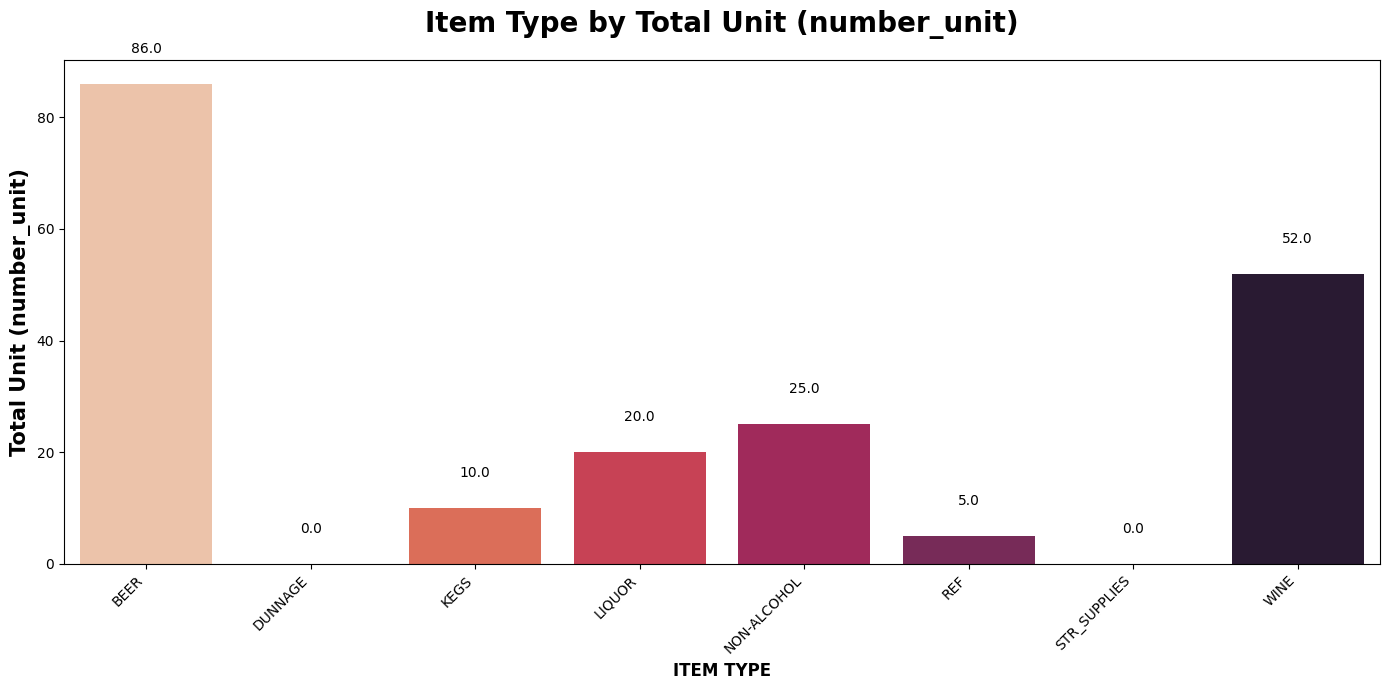

In [113]:
#GroupBy 'ITEM TYPE' and get the counts of unique 'NUMBER UNIT' for each DataFrame
group_by_number_unit = ex.groupby('ITEM TYPE')['NUMBER UNIT'].nunique()

# Assuming group_by_number_unit is already calculated as in the previous response

plt.figure(figsize=(14, 7))  # Adjust figure size as needed
bars = sns.barplot(x=group_by_number_unit.index, y=group_by_number_unit.values, palette="rocket_r") # This line returns an Axes object
plt.title("Item Type by Total Unit (number_unit)", weight="bold", fontsize=20, pad=20)
plt.ylabel("Total Unit (number_unit)", weight="bold", fontsize=15)
plt.xlabel("ITEM TYPE", weight="bold", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()

# Iterate through the patches (bars) of the Axes object
for bar in bars.patches:  # Access the patches property for iteration
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

plt.savefig(f'Item Type By Total Unit.jpg')
plt.show()
#files.download("Item Type By Total Unit.jpg")

####Retail Sales
Definition: Sales made directly to individual customers from a retail store or platform.


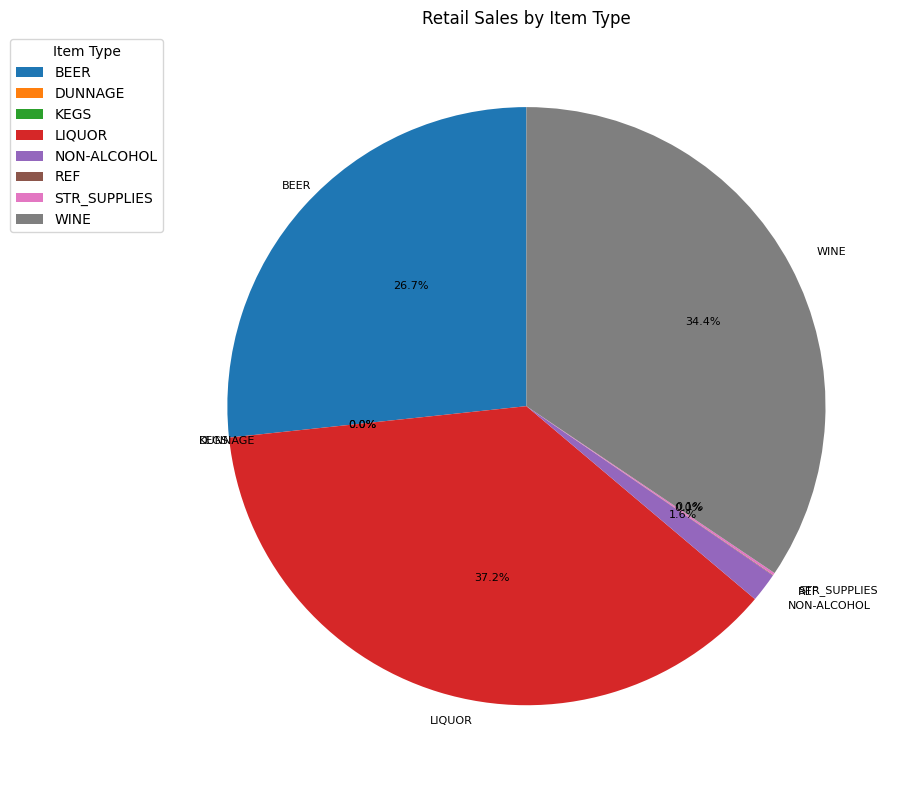

In [114]:
#'ITEM TYPE' and sum 'RETAIL SALES'
transfers_by_year=ex.groupby('ITEM TYPE')['RETAIL SALES'].sum()

#calculate the pie chart values
pie_values_postive = transfers_by_year.values

#create a figure with two subplots arranged horizontally
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))

# Create the  pie chart
wedges, texts, autotexts=ax1.pie(pie_values_postive, labels=transfers_by_year.index, autopct='%1.1f%%', startangle=90,
        textprops={'fontsize': 8, 'rotation_mode':'anchor','ha':'left'}) # Adjust the label

ax1.set_title('Retail Sales by Item Type')

# Add legends for both pie charts
ax1.legend(wedges, transfers_by_year.index, title="Item Type", loc="best", bbox_to_anchor=(-0.2, 0, 0.5, 1))


# adjust spacing between subplots
plt.tight_layout()

plt.savefig(f'Retail Sales by Item Type.jpg')
plt.show()
#files.download("Retail Sales by Item Type.jpg")

Negative retail sales values are not inherently bad,they are part of  maintaining accurate sales records. Common reasons include:

Customer returns.

Error corrections.

Excessive discounts or refunds.

Inventory shrinkage adjustments.

Internal stock movements.


In [115]:
def corr_map(df,title,savefig_name='corr_map.jpg', method='spearman',
             numeric_only = True, tick_size = 10, annot_size=14,
             annot_kws=8, cbar=False):

    mask = np.triu(np.ones_like(df.corr(numeric_only=numeric_only), dtype=bool))

    heatmap = sns.heatmap(df.corr(method=method, numeric_only = numeric_only),
                          fmt = '.2f', cbar=cbar, annot = True,
                          annot_kws = {'size': annot_kws}, mask=mask, cmap='BrBG')

    plt.xticks(rotation=80, fontsize= tick_size)
    plt.yticks( fontsize= tick_size)

    heatmap.set_title(title, fontdict={'fontsize':annot_size}, pad=12)
    plt.tight_layout()
    plt.savefig(savefig_name)
    plt.show();

In [116]:
ex.columns

Index(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES',
       'BRAND NAME', 'QUANTITY', 'STD UNIT', 'NUMBER UNIT',
       'WAREHOUSE DISPATCH UNITS', 'RETURN', 'TRANSFERS RETURN'],
      dtype='object')

In [117]:
droplist=['SUPPLIER','ITEM CODE', 'ITEM DESCRIPTION','ITEM TYPE','NUMBER UNIT', 'STD UNIT','QUANTITY','BRAND NAME']

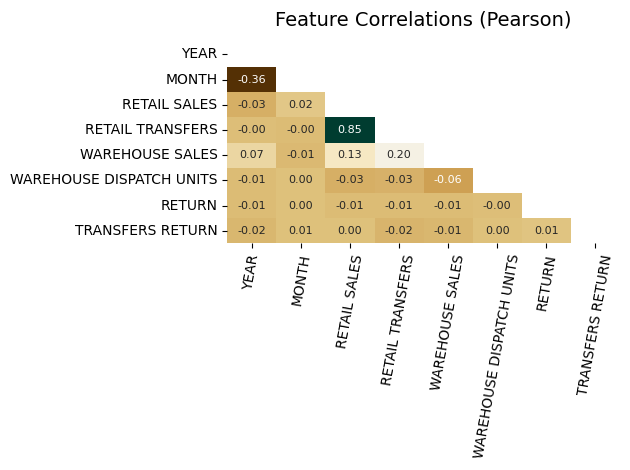

In [118]:
corr_map(ex.drop(droplist,axis =1), method='spearman',
         title='Feature Correlations (Pearson)', cbar=False,
         savefig_name = 'pearson_correlations.jpg')
plt.show()
#files.download("pearson_correlations.jpg")

# Multivariate Analysis

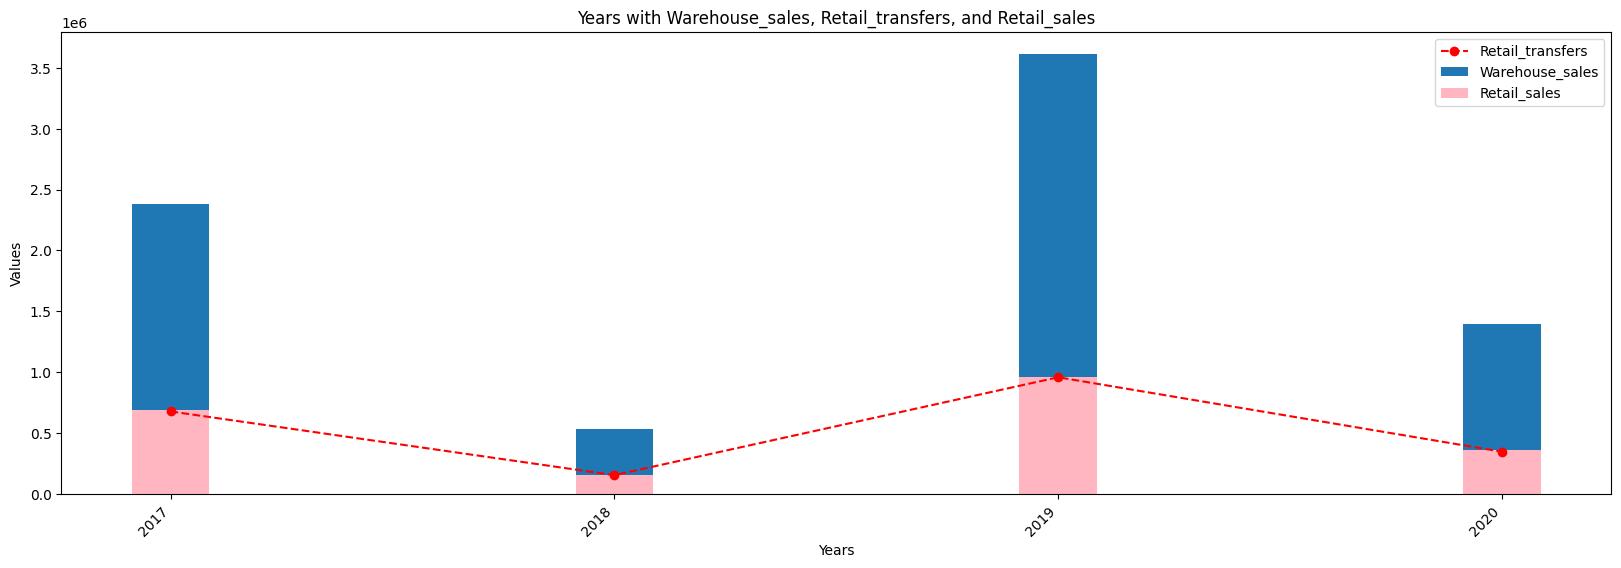

In [119]:
# Convert 'YEAR' column to string
ex['YEAR'] = ex['YEAR'].astype(str)

# Group by 'YEAR' and calculate mean and sum directly during aggregation
multi_analysis = ex.groupby('YEAR')[['RETAIL SALES', 'WAREHOUSE SALES', 'RETAIL TRANSFERS']].agg({
    'RETAIL SALES': 'sum',
    'WAREHOUSE SALES': 'sum',
    'RETAIL TRANSFERS': 'sum'
})

# Plotting
fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.35
bar_set = bar_width / 2

# Plot warehouse_sales as bars
plt.bar(multi_analysis.index, multi_analysis['WAREHOUSE SALES'], align='center', label='Warehouse_sales', width=bar_set)

# Plot retail_transfers as a line plot
plt.plot(multi_analysis.index, multi_analysis['RETAIL TRANSFERS'], linestyle='--', label='Retail_transfers', color='red', marker='o')

# Plot retail_sales as bars
plt.bar(multi_analysis.index, multi_analysis['RETAIL SALES'], align='center', label='Retail_sales', width=bar_set, color='lightpink')

# Formatting the plot
plt.xlabel("Years")
plt.ylabel("Values")
plt.title("Years with Warehouse_sales, Retail_transfers, and Retail_sales")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis values for better readability

plt.legend()

# Save the plot
plt.savefig("Years_with_warehouse_sales_and_retail_transfers_and_Retail_sales.jpg")
plt.show()
#files.download("Years_with_warehouse_sales_and_retail_transfers_and_Retail_sales.jpg")


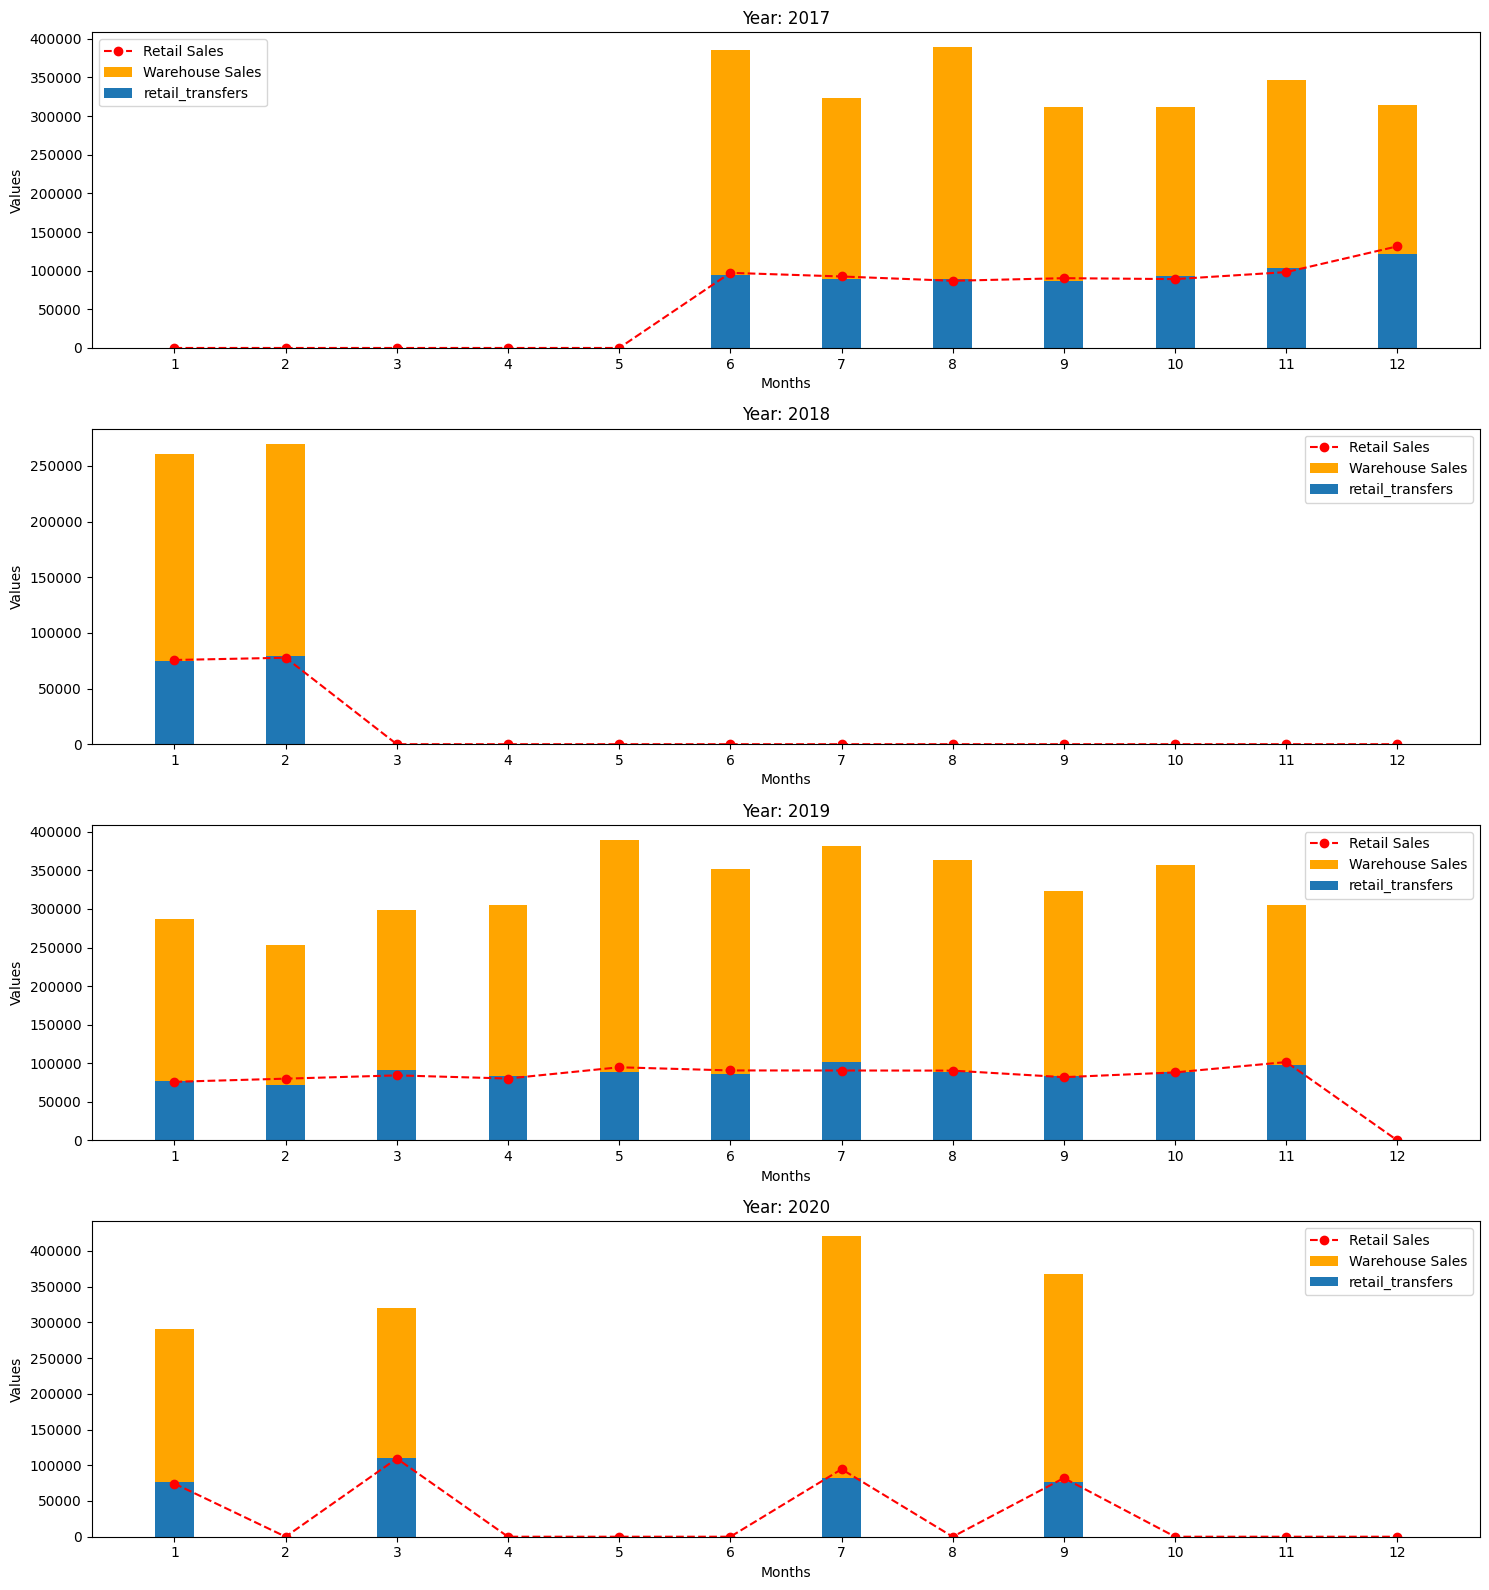

In [120]:
# Convert 'MONTH' column to string for consistent indexing
ex['MONTH'] = ex['MONTH'].astype(str)

# Ensure years are sorted
years = sorted(ex['YEAR'].unique())  # Sort years explicitly

# Group data for analysis, handling missing months
# Use actual column names from the DataFrame (case-sensitive)
multi_analysis = ex[['RETAIL SALES', 'WAREHOUSE SALES', 'RETAIL TRANSFERS', 'MONTH', 'YEAR']] \
    .groupby(['MONTH', 'YEAR'])[['RETAIL SALES', 'WAREHOUSE SALES', 'RETAIL TRANSFERS']].sum()

# Create a complete list of months for the x-axis
all_months = [str(m) for m in range(1, 13)]  # Months 1 to 12 as strings

# Create subplots for each year
fig, axes = plt.subplots(len(years), 1, figsize=(15, len(years) * 4))  # Adjust height dynamically

# Iterate through years and plot on corresponding subplot
for i, year in enumerate(years):
    # Extract and reindex data for the current year to ensure all months are included
    year_data = multi_analysis.loc[(slice(None), year), :] \
        .reindex(pd.MultiIndex.from_product([all_months, [year]], names=['MONTH', 'YEAR']), fill_value=0)

    # Plot bars for 'warehouse_sales' using actual column name
    axes[i].bar(year_data.index.get_level_values('MONTH'), year_data['WAREHOUSE SALES'], align='center', label='Warehouse Sales', width=0.35, color='orange')

    # Plot a line for 'retail_sales' using actual column name
    axes[i].plot(year_data.index.get_level_values('MONTH'), year_data['RETAIL SALES'], linestyle='--', label='Retail Sales', color='red', marker='o')

    # Plot a line for 'retail_transfers' using actual column name
    axes[i].bar(year_data.index.get_level_values('MONTH'), year_data['RETAIL TRANSFERS'], align='center', label='retail_transfers', width=0.35)  # Use index for x-axis

    # Customize the subplot
    axes[i].set_xlabel("Months")
    axes[i].set_ylabel("Values")
    axes[i].set_title(f"Year: {year}")
    axes[i].legend()
    axes[i].set_xticks(range(0, 12))  # Ensure months 1-12 are displayed
    axes[i].set_xticklabels(all_months)  # Label x-axis with months

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('Monthly with warehouse_sales and retail_transfers and Retail_sales.jpg')
plt.show()
#files.download("Monthly with warehouse_sales and retail_transfers and Retail_sales.jpg")

In [121]:
ex.head(10)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,BRAND NAME,QUANTITY,STD UNIT,NUMBER UNIT,WAREHOUSE DISPATCH UNITS,RETURN,TRANSFERS RETURN
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0,0,2,BOOTLEG RED,750ML,750.0 ML,750 ML,0,0,0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0,1,4,MOMENT DE PLAISIR,750ML,750.0 ML,750 ML,0,0,0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0,0,1,S SMITH ORGANIC PEAR CIDER,18.7OZ,18.7 OZ,18.7 OZ,0,0,0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0,0,1,SCHLINK HAUS KABINETT,750ML,750.0 ML,750 ML,0,0,0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,1,0,0,SANTORINI GAVALA WHITE,750ML,750.0 ML,750 ML,0,0,0
5,2020,1,KYSELA PERE ET FILS LTD,100641,CORTENOVA VENETO P/GRIG - 750ML,WINE,3,0,6,CORTENOVA VENETO P GRIG,750ML,750.0 ML,750 ML,0,0,0
6,2020,1,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0,1,1,SANTA MARGHERITA P GRIG ALTO,375ML,375.0 ML,375 ML,0,0,0
7,2020,1,BROWN-FORMAN BEVERAGES WORLDWIDE,1008,JACK DANIELS COUNTRY COCKTAIL SOUTHERN PEACH -...,BEER,0,0,2,JACK DANIELS COUNTRY COCKTAIL SOUTHERN PEACH NR,10.OZ,1 OZ,<NA>,0,0,0
8,2020,1,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,6,4,0,KNOB CREEK BOURBON 9YR,375ML,375.0 ML,375 ML,0,0,0
9,2020,1,INTERNATIONAL CELLARS LLC,101117,KSARA CAB - 750ML,WINE,0,1,2,KSARA CAB,750ML,750.0 ML,750 ML,0,0,0


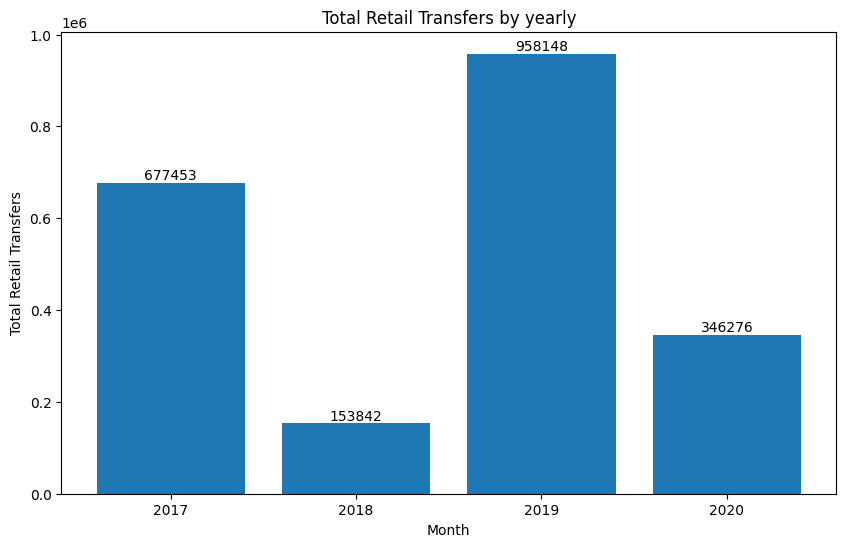

In [138]:
# Convert 'YEAR' column to string
ex['YEAR'] = ex['YEAR'].astype(str)

# Group data by yearly and sum retail sales
yearly_sales = ex.groupby('YEAR')['RETAIL TRANSFERS'].sum().reset_index()

# Calculate total sales across all monthly
total_sales = yearly_sales['RETAIL TRANSFERS'].sum()

# Create the histogram with percentage labels
plt.figure(figsize=(10, 6))
plt.subplot(1,1,1) # Corrected subplot declaration
# Use yearly_sales DataFrame instead of yearly_sales for x and y values
bars = plt.bar(yearly_sales['YEAR'], yearly_sales['RETAIL TRANSFERS'])
plt.title('Total Retail Transfers by yearly')
plt.xlabel('Month')
plt.ylabel('Total Retail Transfers')
plt.xticks(yearly_sales['YEAR'])  # Set x-axis ticks to month

# add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')
    # Adjust 'yval + 5' for label position
plt.savefig(f'Total Retail Transfers by yearly.jpg')
plt.show()
#files.download("Total Retail Transfers by monthly.jpg")

In [123]:
ex.to_csv("next_process.csv")

In [132]:
return_summary = ex.groupby(['ITEM TYPE', 'YEAR'])['RETURN'].sum().reset_index(name='Total Returns')
return_summary['Total Returns'] = return_summary['Total Returns'] > 0  # Compare only the 'Total Returns' column
print(return_summary)

       ITEM TYPE  YEAR  Total Returns
0           BEER  2017          False
1           BEER  2018          False
2           BEER  2019          False
3           BEER  2020          False
4        DUNNAGE  2017          False
5        DUNNAGE  2018          False
6        DUNNAGE  2019          False
7        DUNNAGE  2020          False
8           KEGS  2017          False
9           KEGS  2018          False
10          KEGS  2019          False
11          KEGS  2020          False
12        LIQUOR  2017           True
13        LIQUOR  2018          False
14        LIQUOR  2019           True
15        LIQUOR  2020          False
16   NON-ALCOHOL  2017          False
17   NON-ALCOHOL  2018          False
18   NON-ALCOHOL  2019          False
19   NON-ALCOHOL  2020          False
20           REF  2017          False
21           REF  2018          False
22           REF  2019          False
23           REF  2020          False
24  STR_SUPPLIES  2017          False
25  STR_SUPP

In [134]:
# Pivot the table to get desired structure
pivot_table = ex.pivot_table(
    values='RETURN',
    index='ITEM TYPE',
    columns='YEAR',
    aggfunc='sum'
).fillna(0)


print(pivot_table)
plt.savefig('Pivot Table Return By Years.jpg')
plt.show()
#files.download("Pivot Table Return By Years.jpg")

YEAR          2017  2018  2019  2020
ITEM TYPE                           
BEER             0     0     0     0
DUNNAGE          0     0     0     0
KEGS             0     0     0     0
LIQUOR           8     0     1     0
NON-ALCOHOL      0     0     0     0
REF              0     0     0     0
STR_SUPPLIES     0     0     0     0
WINE            12     2     5     0


<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>